In [32]:
from IPython.display import Image

import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots


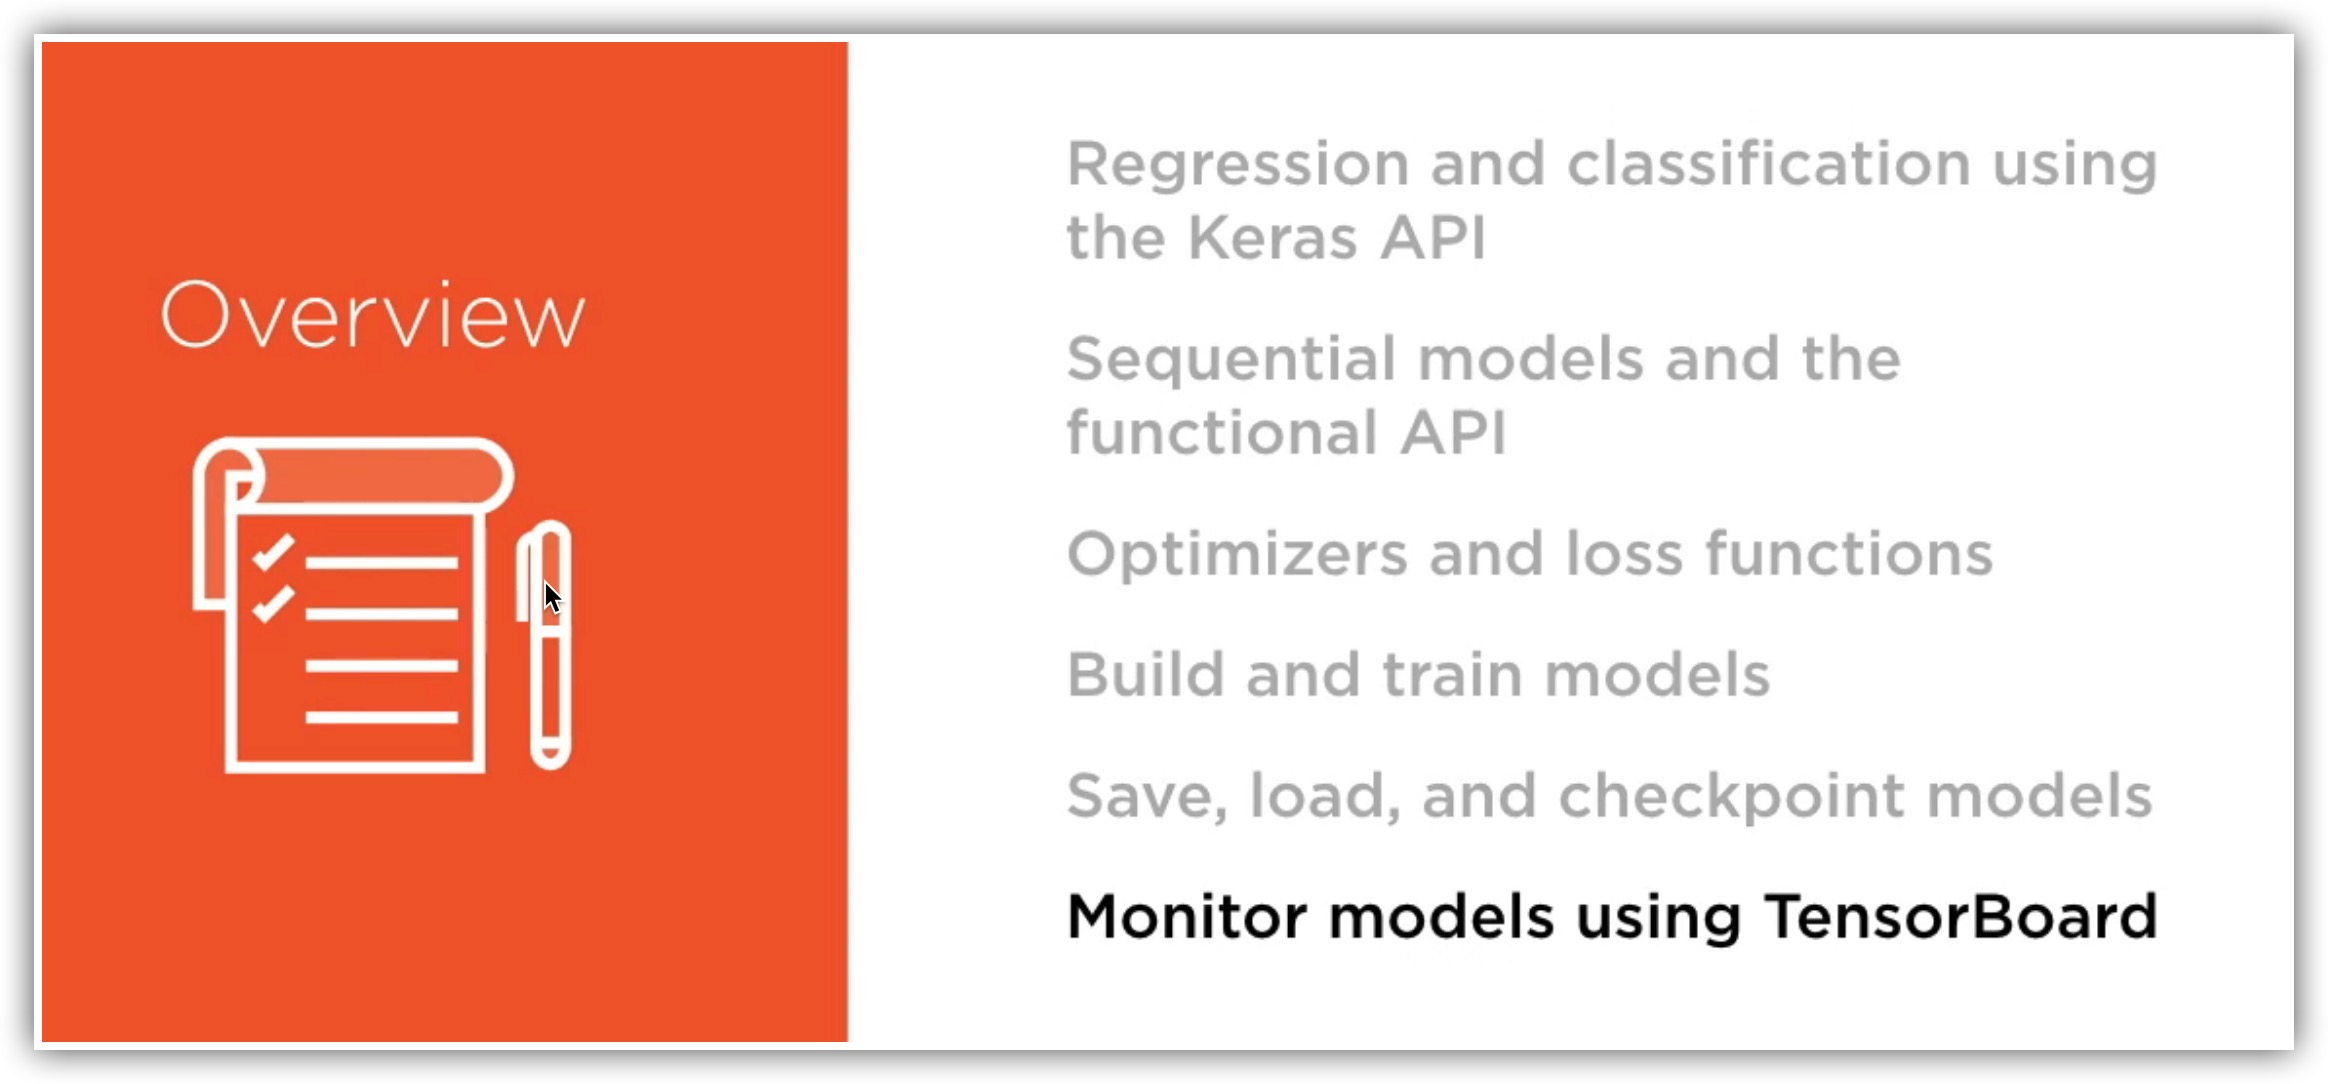

In [3]:
'''
We'll build and train both a regression model, as well as a classification model using Keras. 
We'll see how we can use sequential models, which is just a linear stack of layers. 

We'll also build and train a model using the functional API. 
For each of these models, before we start the training process, we'll configure the parameters for this
model including optimizers and the loss functions. 

We'll then build and train these models using the fit API in Keras.

Once we have a fully trained model, we'll see how we can serialize the model out to disk and 
reload from a previously saved model to use a model for prediction. 

And finally, we'll round this module off by seeing how we can monitor models using TensorBoard.
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_11-20-26.jpg')

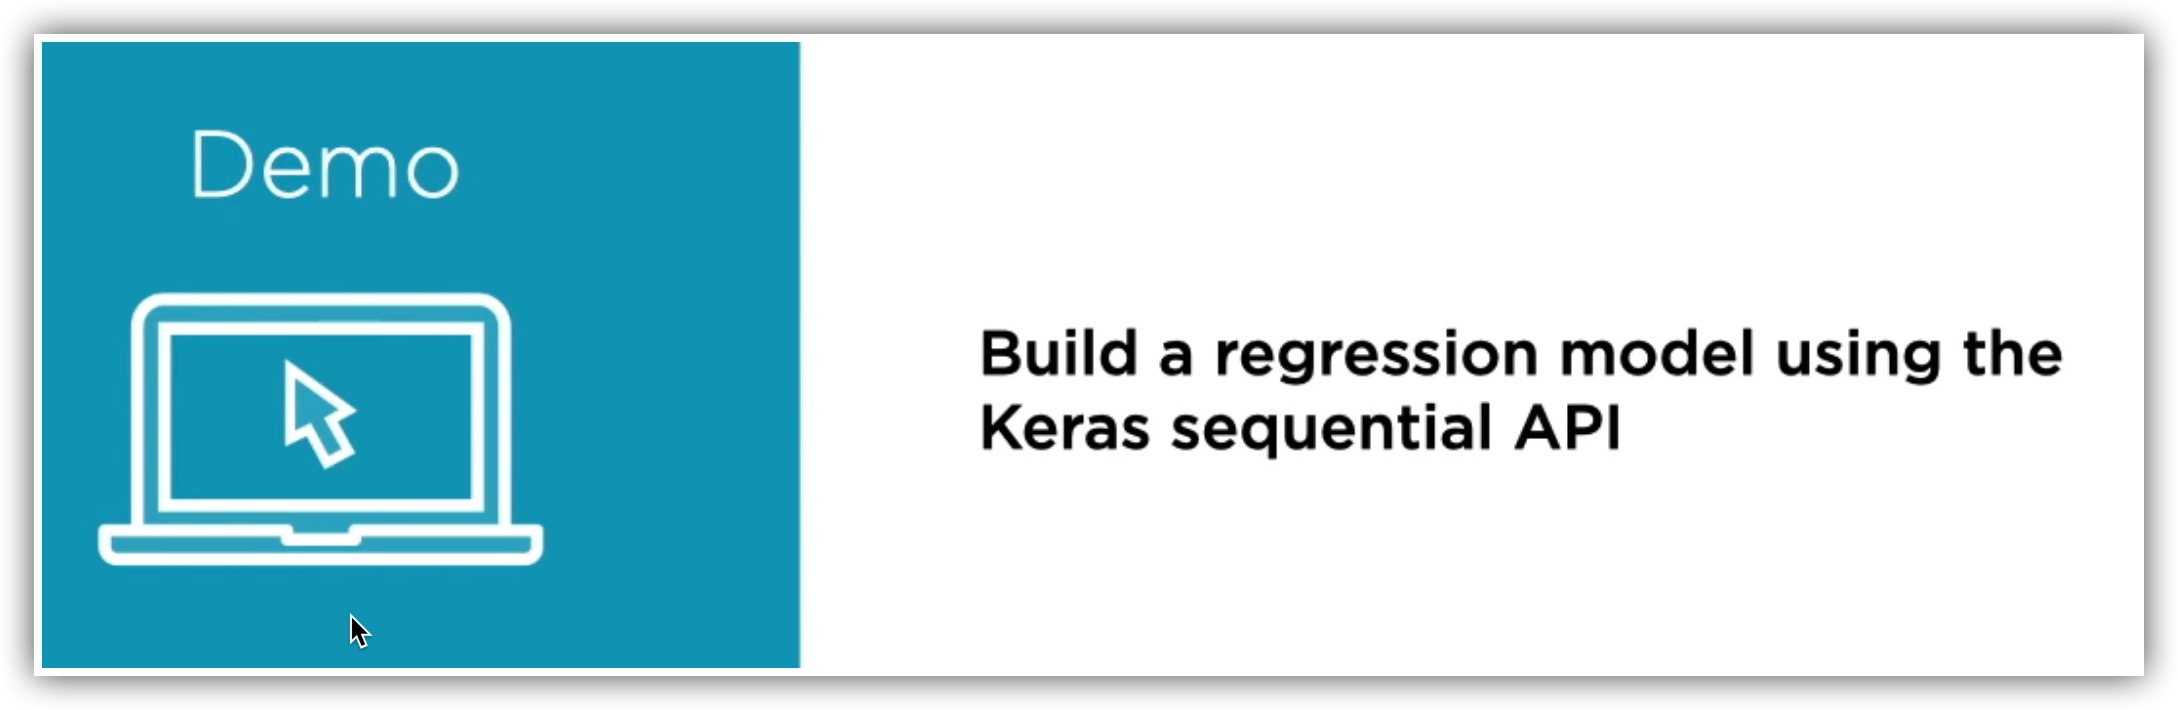

In [4]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_11-21-12.jpg')

In [3]:
'''
We discussed earlier that Keras offers a high‑level API for us to build and train deep 
learning models using any backend and Tensorflow is one of the backends that Keras supports. 
'''
keras.__version__

'2.12.0'

In [4]:
from tabulate import tabulate
def DisplayMatrix(M):
    print(tabulate(M, headers='keys', tablefmt='double_grid'))

In [7]:
'''
 The records in this insurance dataset gives us the characteristics of various individuals within 
 a country and the insurance charges that they've been charged. 
 
 We have the age, sex, BMI, number of children, whether the individual is a smoker or not, and their region. 
 
 We'll use these features to predict the insurance charges, that is the last column here, 
 that are applied to an individual.
'''
data =pd.read_csv('./datasets/insurance.csv')
DisplayMatrix(data.sample(10))

#https://www.kaggle.com/datasets/mirichoi0218/insurance

╔══════╦═══════╦════════╦════════╦════════════╦══════════╦═══════════╦═══════════╗
║      ║   age ║ sex    ║    bmi ║   children ║ smoker   ║ region    ║   charges ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║ 1079 ║    63 ║ male   ║ 33.66  ║          3 ║ no       ║ southeast ║  15161.5  ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║  580 ║    59 ║ male   ║ 25.46  ║          1 ║ no       ║ northeast ║  12914    ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║  103 ║    61 ║ female ║ 29.92  ║          3 ║ yes      ║ southeast ║  30942.2  ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║ 1309 ║    41 ║ male   ║ 32.2   ║          2 ║ no       ║ southwest ║   6875.96 ║
╠══════╬═══════╬════════╬════════╬════════════╬══════════╬═══════════╬═══════════╣
║  858 ║    25 ║ female ║ 32.23  ║          1 ║ no       ║ southeast ║  18218.2  ║
╠═══

In [8]:
data.shape

(1338, 7)

In [9]:
'''
The data itself is fairly clean. There are no null or missing values. 
Data.isna() sum will show you zeros for all columns.
'''
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
'''
We can get a quick statistical overview of the numeric columns that exist in our dataset 
using the describe function in Pandas. 

You can see the mean and standard deviation for age, BMI, and charges are all very different. 
Age and BMI are features and charges is the target of our regression, which means our 
features need to be preprocessed.
'''

data[['age', 'bmi', 'charges']].describe()

age          bmi       charges
count  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397  13270.422265
std      14.049960     6.098187  12110.011237
min      18.000000    15.960000   1121.873900
25%      27.000000    26.296250   4740.287150
50%      39.000000    30.400000   9382.033000
75%      51.000000    34.693750  16639.912515
max      64.000000    53.130000  63770.428010

In [11]:
'''
Let's move on to sex or gender, which is a categorical variable. 
You can see that we have roughly an equal number of males and females in this dataset.
'''
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
'''
Let's look at smoker, and here you can see that the data is a little skewed. 
We have more non‑smokers than smokers in our data. 
'''
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
'''
The region categorical variable will tell us how individuals are spread across the 
country and you can see that individuals are evenly distributed.
'''
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

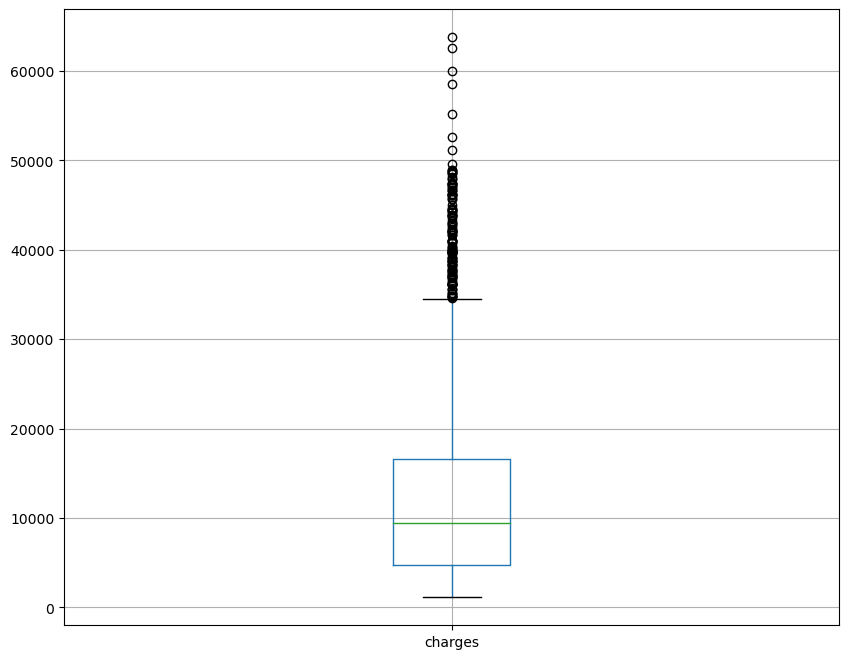

In [16]:
'''
Let's quickly see how insurance charges are distributed by taking a look at a box plot of 
insurance charges. 

You can see that most individuals have insurance charges in the range 5,000 to maybe under $20,000. 

The box here represents the interquartile range of our charges data, and you can see that the 
median is somewhere under $10,000, but there are several outliers, individuals who paid 
between 35 and $80,000 in insurance each year. 
'''
plt.figure(figsize=(10, 8))
data.boxplot(column='charges')
plt.show()

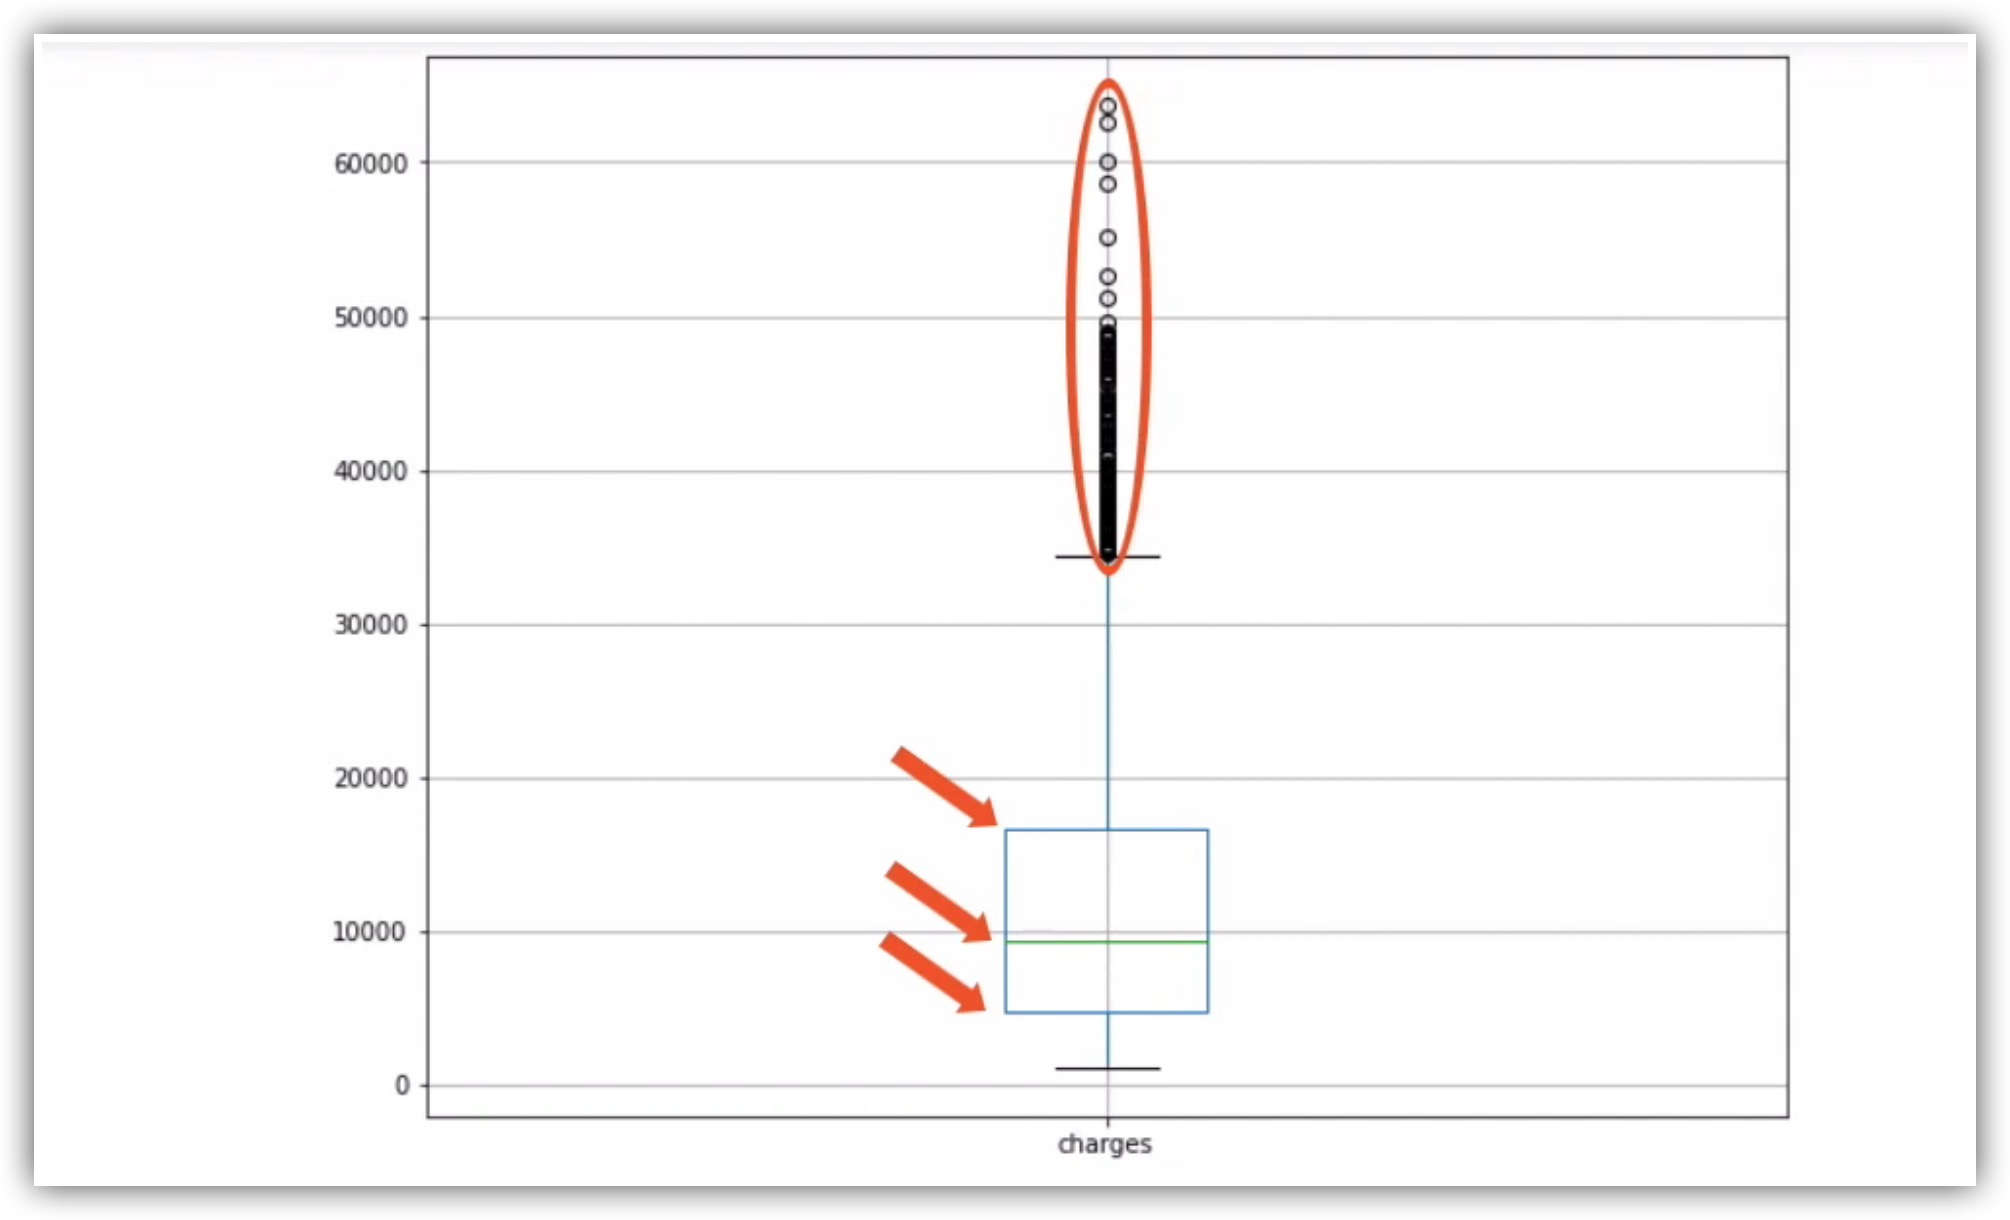

In [17]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_12-11-39.jpg')

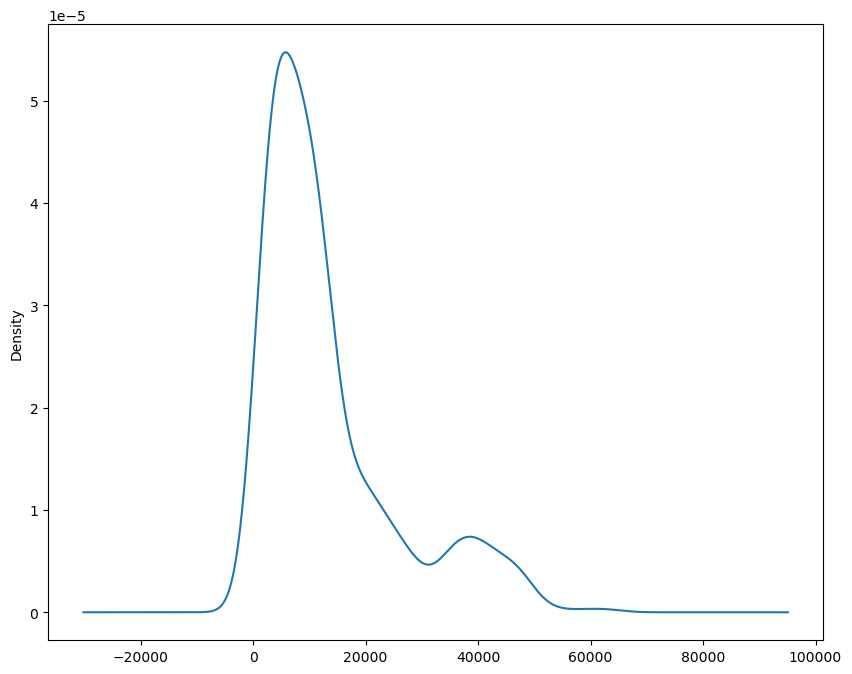

In [18]:
'''
 Another visualisation technique that is useful when working with univariate data in order to 
 view distributions is the kernel density estimation, the KDE curve. The KDE curve gives us 
 a probability distribution of our data, and you can see that the curve for charges has two peaks. 
 
 Most records are at around the $10,000 range, but there is a spike at around the $40,000 range.
'''
plt.figure(figsize=(10, 8))
data['charges'].plot(kind='kde')
plt.show()

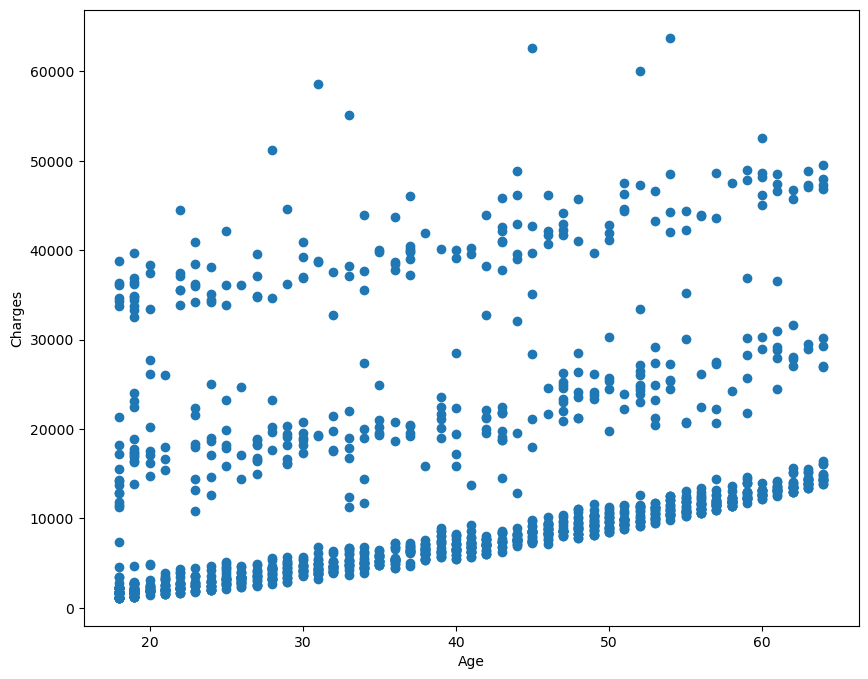

In [19]:
'''
If you want to view the bivariant relationships that exist in your data, the scatter 
plot is a great visualization. 

Here is a scatter plot of age versus insurance charges. There are some clear patterns visible here, 
but in general, as age rises, insurance charges seem to rise. 
'''
plt.figure(figsize=(10, 8))
plt.scatter(data['age'], data['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [20]:
'''
I'm going to extract all of the features here, which includes all columns, except the charges 
column into the features data frame, and I'll hold the charges in the target data frame.
'''
features = data.drop('charges', axis=1)
target = data[['charges']]

In [21]:
'''
The preprocessing that I'll perform on categorical features in our data will be a little different 
as we'll extract these separately into another data frame called categorical_features, 
which contains sex, smoker, and region. 
'''
categorical_features=features[['sex', 'smoker', 'region']].copy()
DisplayMatrix(categorical_features.head())

╔════╦════════╦══════════╦═══════════╗
║    ║ sex    ║ smoker   ║ region    ║
╠════╬════════╬══════════╬═══════════╣
║  0 ║ female ║ yes      ║ southwest ║
╠════╬════════╬══════════╬═══════════╣
║  1 ║ male   ║ no       ║ southeast ║
╠════╬════════╬══════════╬═══════════╣
║  2 ║ male   ║ no       ║ southeast ║
╠════╬════════╬══════════╬═══════════╣
║  3 ║ male   ║ no       ║ northwest ║
╠════╬════════╬══════════╬═══════════╣
║  4 ║ male   ║ no       ║ northwest ║
╚════╩════════╩══════════╩═══════════╝


In [22]:
'''
Similarly, to perform processing on numeric features, I'll pull these out into a separate 
data frame called numeric features. Age, BMI, and children are what I consider numeric features. 
'''
numeric_features=features.drop(['sex', 'smoker', 'region'],axis=1)
DisplayMatrix(numeric_features.head())

╔════╦═══════╦════════╦════════════╗
║    ║   age ║    bmi ║   children ║
╠════╬═══════╬════════╬════════════╣
║  0 ║    19 ║ 27.9   ║          0 ║
╠════╬═══════╬════════╬════════════╣
║  1 ║    18 ║ 33.77  ║          1 ║
╠════╬═══════╬════════╬════════════╣
║  2 ║    28 ║ 33     ║          3 ║
╠════╬═══════╬════════╬════════════╣
║  3 ║    33 ║ 22.705 ║          0 ║
╠════╬═══════╬════════╬════════════╣
║  4 ║    32 ║ 28.88  ║          0 ║
╚════╩═══════╩════════╩════════════╝


In [23]:
'''
Machine learning models, as you know, can only work with numeric data, so I'm going to 
encode female and male values using numbers 0 and 1. 

I'll replace the values in the sex column using 0 and 1, 0 for female, 1 for male. 
Using a dictionary, I've label encoded my gender data.
'''

gender_dict={'female':0,'male':1}
categorical_features['sex'].replace(gender_dict,inplace=True)
DisplayMatrix(categorical_features.head())

╔════╦═══════╦══════════╦═══════════╗
║    ║   sex ║ smoker   ║ region    ║
╠════╬═══════╬══════════╬═══════════╣
║  0 ║     0 ║ yes      ║ southwest ║
╠════╬═══════╬══════════╬═══════════╣
║  1 ║     1 ║ no       ║ southeast ║
╠════╬═══════╬══════════╬═══════════╣
║  2 ║     1 ║ no       ║ southeast ║
╠════╬═══════╬══════════╬═══════════╣
║  3 ║     1 ║ no       ║ northwest ║
╠════╬═══════╬══════════╬═══════════╣
║  4 ║     1 ║ no       ║ northwest ║
╚════╩═══════╩══════════╩═══════════╝


In [24]:
'''
 Let's apply label encoding to the smoker data as well. Null is 0 and yes is 1. 
 I'll use the replace/inplace function, and here is my smoker data nicely label encoded.
'''
smoker_dict={'no':0,'yes':1}
categorical_features['smoker'].replace(smoker_dict,inplace=True)
DisplayMatrix(categorical_features.head())

╔════╦═══════╦══════════╦═══════════╗
║    ║   sex ║   smoker ║ region    ║
╠════╬═══════╬══════════╬═══════════╣
║  0 ║     0 ║        1 ║ southwest ║
╠════╬═══════╬══════════╬═══════════╣
║  1 ║     1 ║        0 ║ southeast ║
╠════╬═══════╬══════════╬═══════════╣
║  2 ║     1 ║        0 ║ southeast ║
╠════╬═══════╬══════════╬═══════════╣
║  3 ║     1 ║        0 ║ northwest ║
╠════╬═══════╬══════════╬═══════════╣
║  4 ║     1 ║        0 ║ northwest ║
╚════╩═══════╩══════════╩═══════════╝


In [25]:
'''
 And as for the region column, I'm going to use one‑hot encoding using pd.get_dummies. 
 
 This will give me regions in one‑hot encoded form. The original region column will be replaced. 
 
 We now have four columns to represent the region, region_northeast, northwest, and so on. 
 A value of one in a column indicates that the individual lives in that particular region. 
'''
categorical_features=pd.get_dummies(categorical_features,columns=['region'])
DisplayMatrix(categorical_features.head())

╔════╦═══════╦══════════╦════════════════════╦════════════════════╦════════════════════╦════════════════════╗
║    ║   sex ║   smoker ║   region_northeast ║   region_northwest ║   region_southeast ║   region_southwest ║
╠════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  0 ║     0 ║        1 ║                  0 ║                  0 ║                  0 ║                  1 ║
╠════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  1 ║     1 ║        0 ║                  0 ║                  0 ║                  1 ║                  0 ║
╠════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  2 ║     1 ║        0 ║                  0 ║                  0 ║                  1 ║                  0 ║
╠════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  3 ║    

In [26]:
'''
 If you look at a statistical overview of the numeric features that we have using the describe function, 
 you can see that the means and standard deviations are very different across our numeric features. 
 Our numeric features have very different ranges as well. 
'''
numeric_features.describe()

age          bmi     children
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.663397     1.094918
std      14.049960     6.098187     1.205493
min      18.000000    15.960000     0.000000
25%      27.000000    26.296250     0.000000
50%      39.000000    30.400000     1.000000
75%      51.000000    34.693750     2.000000
max      64.000000    53.130000     5.000000

In [27]:
'''
Now with numeric features, a good practice is to standardize your data so that they have a 
mean of 0 and a variance of 1. 

The standardScalar estimator object in scikit‑learn performs exactly this operation we call 
standardScalar.fit_transform on our numeric features and generate a new data frame with the standardized values.

After standardization, you can see that all of our numeric features have means very close to 0, 
that is there centered around 0 and have standard deviations very close to 1, they have unit variants. 
'''
standardScaler=StandardScaler()
numeric_features=pd.DataFrame(standardScaler.fit_transform(numeric_features),
                              columns=numeric_features.columns,
                              index=numeric_features.index)
DisplayMatrix(numeric_features.head())

╔════╦═══════════╦═══════════╦════════════╗
║    ║       age ║       bmi ║   children ║
╠════╬═══════════╬═══════════╬════════════╣
║  0 ║ -1.43876  ║ -0.45332  ║ -0.908614  ║
╠════╬═══════════╬═══════════╬════════════╣
║  1 ║ -1.50997  ║  0.509621 ║ -0.0787672 ║
╠════╬═══════════╬═══════════╬════════════╣
║  2 ║ -0.797954 ║  0.383307 ║  1.58093   ║
╠════╬═══════════╬═══════════╬════════════╣
║  3 ║ -0.441948 ║ -1.30553  ║ -0.908614  ║
╠════╬═══════════╬═══════════╬════════════╣
║  4 ║ -0.513149 ║ -0.292556 ║ -0.908614  ║
╚════╩═══════════╩═══════════╩════════════╝


In [28]:
'''
his completes the preprocessing of our features for our regression model. 
I'm going to put the process features together into a single data frame called processed_features. 

If you look at the data frame, it now looks very different. 
These are the features that we'll use to train our model. 
'''

processed_features=pd.concat([numeric_features,categorical_features],axis=1,sort=False)
DisplayMatrix(processed_features.head())

╔════╦═══════════╦═══════════╦════════════╦═══════╦══════════╦════════════════════╦════════════════════╦════════════════════╦════════════════════╗
║    ║       age ║       bmi ║   children ║   sex ║   smoker ║   region_northeast ║   region_northwest ║   region_southeast ║   region_southwest ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  0 ║ -1.43876  ║ -0.45332  ║ -0.908614  ║     0 ║        1 ║                  0 ║                  0 ║                  0 ║                  1 ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  1 ║ -1.50997  ║  0.509621 ║ -0.0787672 ║     1 ║        0 ║                  0 ║                  0 ║                  1 ║                  0 ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬══════════════

In [30]:
'''
 I'll put the process features and the target into a single data frame called processed_data. 
 This contains the process features,

 And once we've performed processing, I'm going to write this process data out to a new 
 CSV file called insurance_processed.csv. 
'''

processed_data=pd.concat([processed_features,target],axis=1,sort=False)
DisplayMatrix(processed_data.head())


╔════╦═══════════╦═══════════╦════════════╦═══════╦══════════╦════════════════════╦════════════════════╦════════════════════╦════════════════════╦═══════════╗
║    ║       age ║       bmi ║   children ║   sex ║   smoker ║   region_northeast ║   region_northwest ║   region_southeast ║   region_southwest ║   charges ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╬═══════════╣
║  0 ║ -1.43876  ║ -0.45332  ║ -0.908614  ║     0 ║        1 ║                  0 ║                  0 ║                  0 ║                  1 ║  16884.9  ║
╠════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╬═══════════╣
║  1 ║ -1.50997  ║  0.509621 ║ -0.0787672 ║     1 ║        0 ║                  0 ║                  0 ║                  1 ║                  0 ║   1725.55 ║
╠════╬═══════════╬═══════════╬════════════╬═══

In [31]:
processed_data.to_csv('./datasets/insurance_processed.csv',index=False)

In [33]:
'''
 I'm going to split the data that I have into training data that we'll use to train our model and test 
 data that we'll use to evaluate our model. 
 
 So we'll use about 1000 records to train our model and 268 records to test our model. 
'''
X_train, X_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2, random_state=1)

In [34]:
DisplayMatrix(X_train.head())

╔═════╦═══════════╦═══════════╦════════════╦═══════╦══════════╦════════════════════╦════════════════════╦════════════════════╦════════════════════╗
║     ║       age ║       bmi ║   children ║   sex ║   smoker ║   region_northeast ║   region_northwest ║   region_southeast ║   region_southwest ║
╠═════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║ 216 ║  0.982076 ║ -0.666578 ║ -0.908614  ║     0 ║        0 ║                  0 ║                  1 ║                  0 ║                  0 ║
╠═════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║ 731 ║  0.982076 ║ -1.51961  ║ -0.0787672 ║     1 ║        0 ║                  0 ║                  0 ║                  0 ║                  1 ║
╠═════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬═══════

In [37]:
DisplayMatrix(X_test.head())

╔══════╦═══════════╦═══════════╦════════════╦═══════╦══════════╦════════════════════╦════════════════════╦════════════════════╦════════════════════╗
║      ║       age ║       bmi ║   children ║   sex ║   smoker ║   region_northeast ║   region_northwest ║   region_southeast ║   region_southwest ║
╠══════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║  559 ║ -1.43876  ║  0.798339 ║ -0.908614  ║     1 ║        0 ║                  0 ║                  1 ║                  0 ║                  0 ║
╠══════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬════════════════════╬════════════════════╣
║ 1087 ║  1.26688  ║  0.143802 ║ -0.908614  ║     1 ║        0 ║                  0 ║                  1 ║                  0 ║                  0 ║
╠══════╬═══════════╬═══════════╬════════════╬═══════╬══════════╬════════════════════╬════════════════════╬

In [36]:
DisplayMatrix(y_train.head())

╔═════╦═══════════╗
║     ║   charges ║
╠═════╬═══════════╣
║ 216 ║  10355.6  ║
╠═════╬═══════════╣
║ 731 ║  10065.4  ║
╠═════╬═══════════╣
║ 866 ║   1141.45 ║
╠═════╬═══════════╣
║ 202 ║  13012.2  ║
╠═════╬═══════════╣
║ 820 ║   7445.92 ║
╚═════╩═══════════╝


In [38]:
DisplayMatrix(y_test.head())

╔══════╦═══════════╗
║      ║   charges ║
╠══════╬═══════════╣
║  559 ║   1646.43 ║
╠══════╬═══════════╣
║ 1087 ║  11353.2  ║
╠══════╬═══════════╣
║ 1020 ║   8798.59 ║
╠══════╬═══════════╣
║  460 ║  10381.5  ║
╠══════╬═══════════╣
║  802 ║   2103.08 ║
╚══════╩═══════════╝


In [40]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1070, 9) (1070, 1) (268, 9) (268, 1)


In [41]:
X_train.keys()

Index(['age', 'bmi', 'children', 'sex', 'smoker', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [43]:
print(len(X_train.keys()))

9


In [44]:
'''
Im going to use a utility function that I set up here called build_model. 

This will build a new sequential model using tf.keras.Sequential. 
Of all of the APIs that Keras offers to build models, the sequential model is the 
most intuitive and straightforward one.

This is used to build a model which has a stack of layers making up your computation graph, 
your neural network graph. Layers are stacked one after the other.
The output of one layer is set as an input to the next layer in the sequence.

Here we've composed our sequential model using built‑in layers in Keras. 
Here is a dense, fully connected layer with 32 neurons, the relu activation function, 
and the shape of the input is specified by the number of features in our data, 
which we obtain using x_train.keys.

In my model here, the 32 neuron first dense layer is followed by another dense fully connected layer, 
this time with 64 neurons and relu activation, and finally a third dense layer with a single neuron. 
This is our output layer.

The output of a regression model is one continuous value. In our case, 
it is the insurance charges predicted by our model. 
That's why we have just one unit or one neuron at the output layer. 

Every layer of our neural network has weights and biases that are trained in the training process. 
The weights of every layer are initialized using the Glorot uniform initializer, 
that is the default, and biases are set to 0. 
If you want to change the way a particular layer's weights and biases are initialized, 
you can do so using an input argument. 

The optimizer that I've chosen here to update the weights of our model during the training process 
is the Adam optimizer, with a learning rate of 0.001. 
The Adam optimizer is computationally efficient and uses less memory, so is often preferred in the real world. 

Once you've constructed your model, you can then configure the learning process for your model 
using the compile function. 

Here I'm going to use the mean square error loss, which is the loss function used with regression models, 
the Adam optimizer, and the metrics that I want to display as I train my model is the mean 
absolute error and the mean square error. 
Compile method doesn't actually start the training process; it simply configures your model to be ready for training.
'''
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(X_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])

    return model

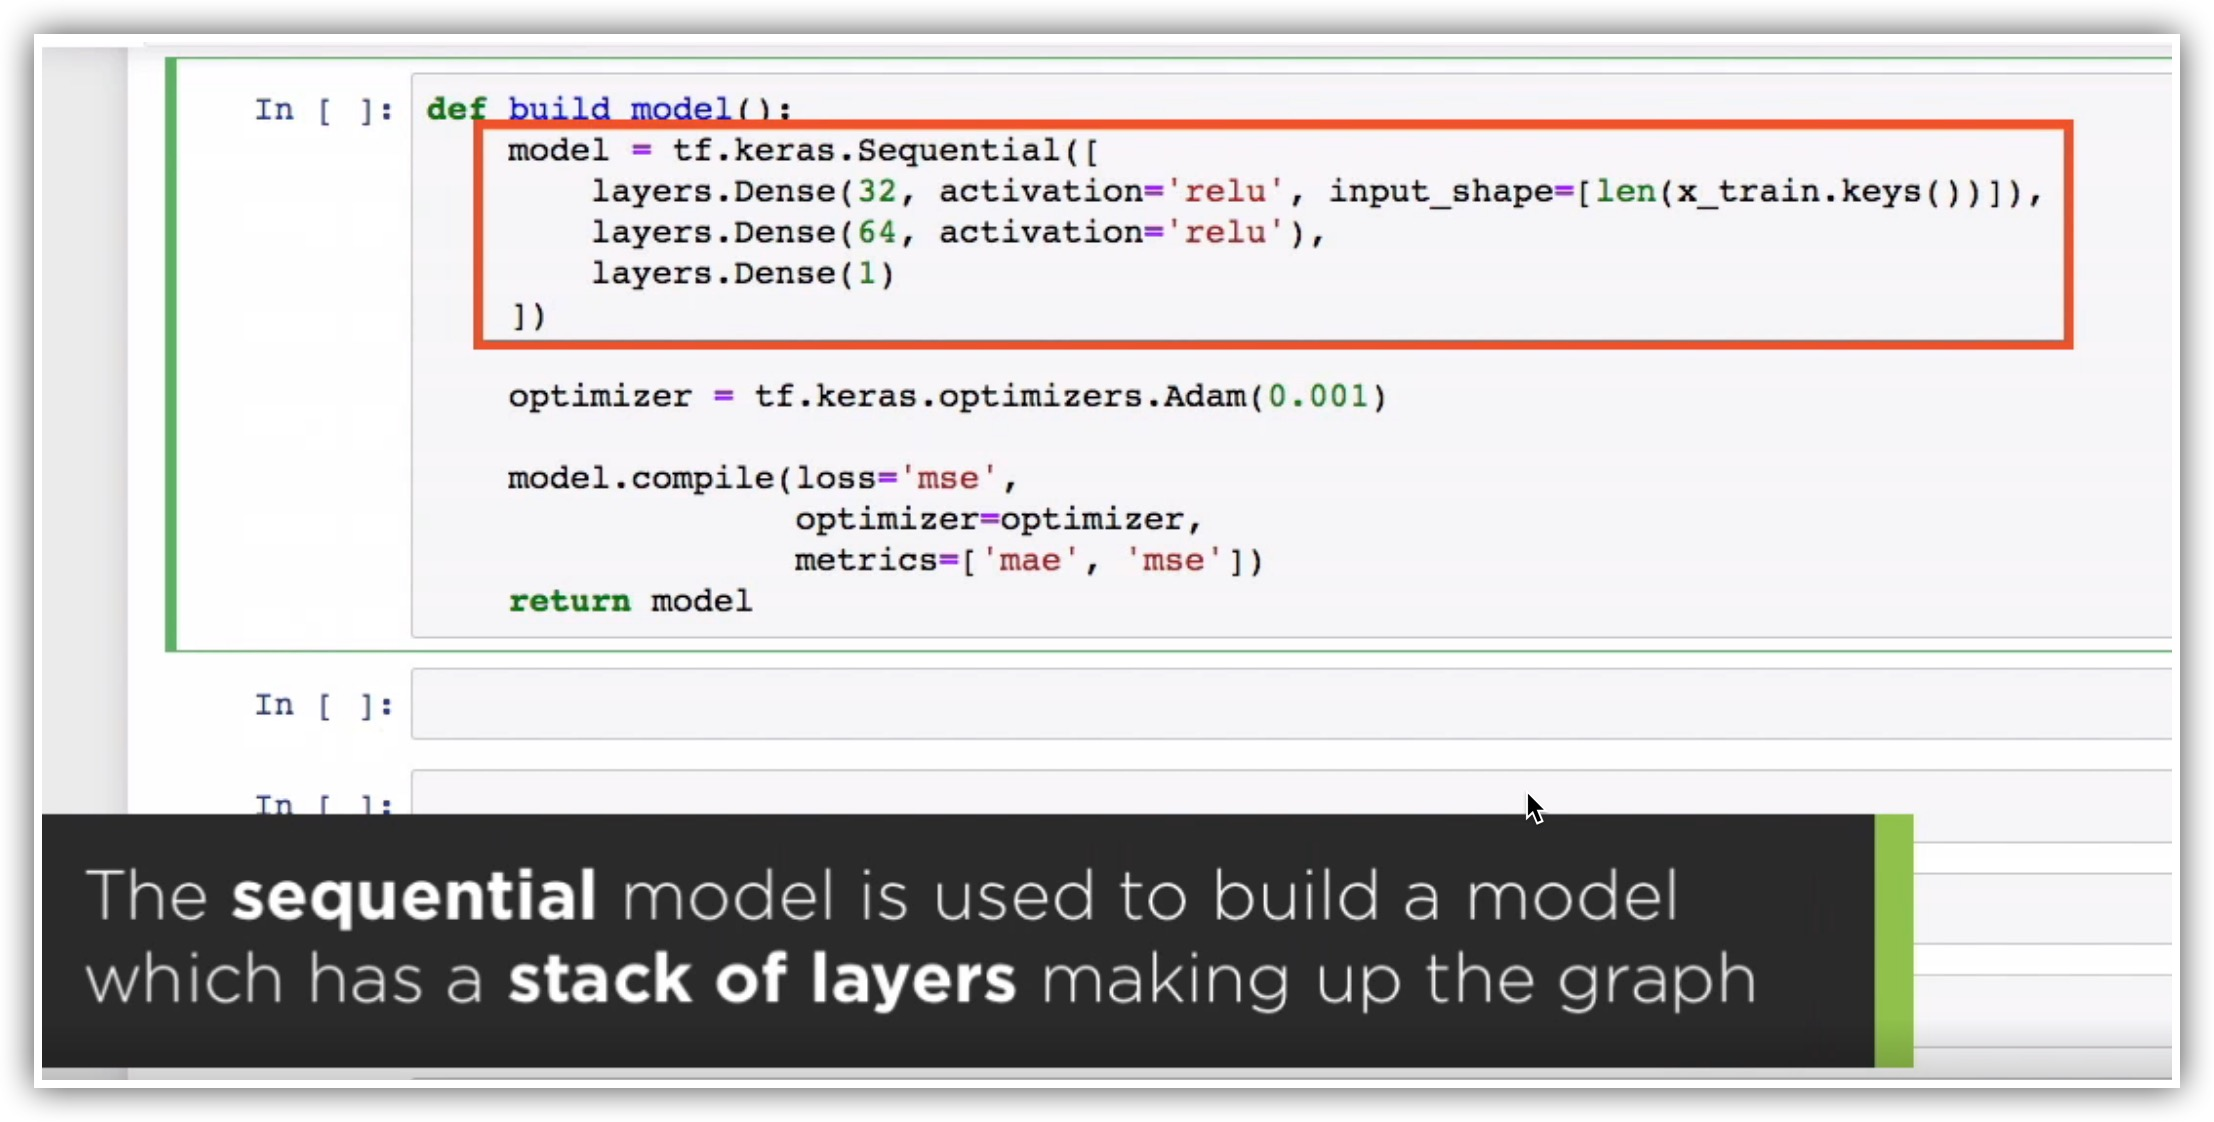

In [45]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-10-52.jpg')

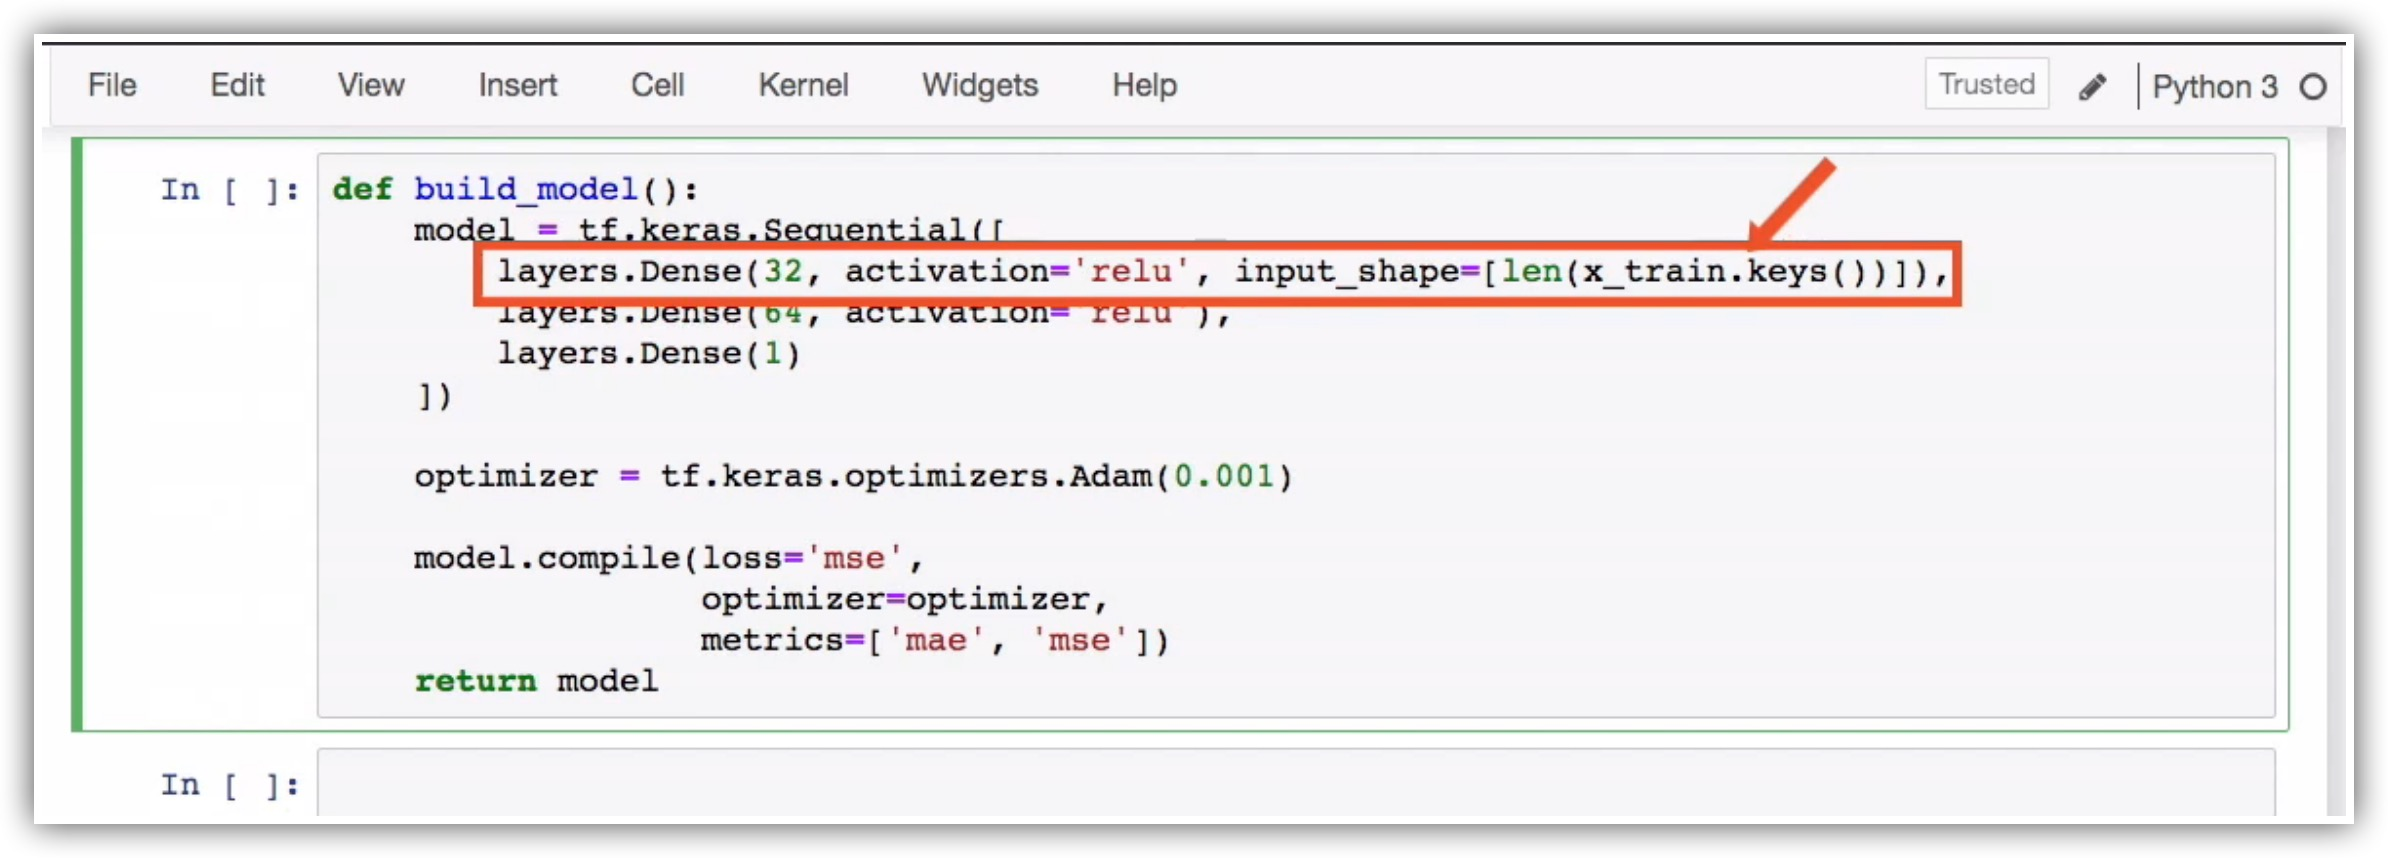

In [46]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-11-20.jpg')

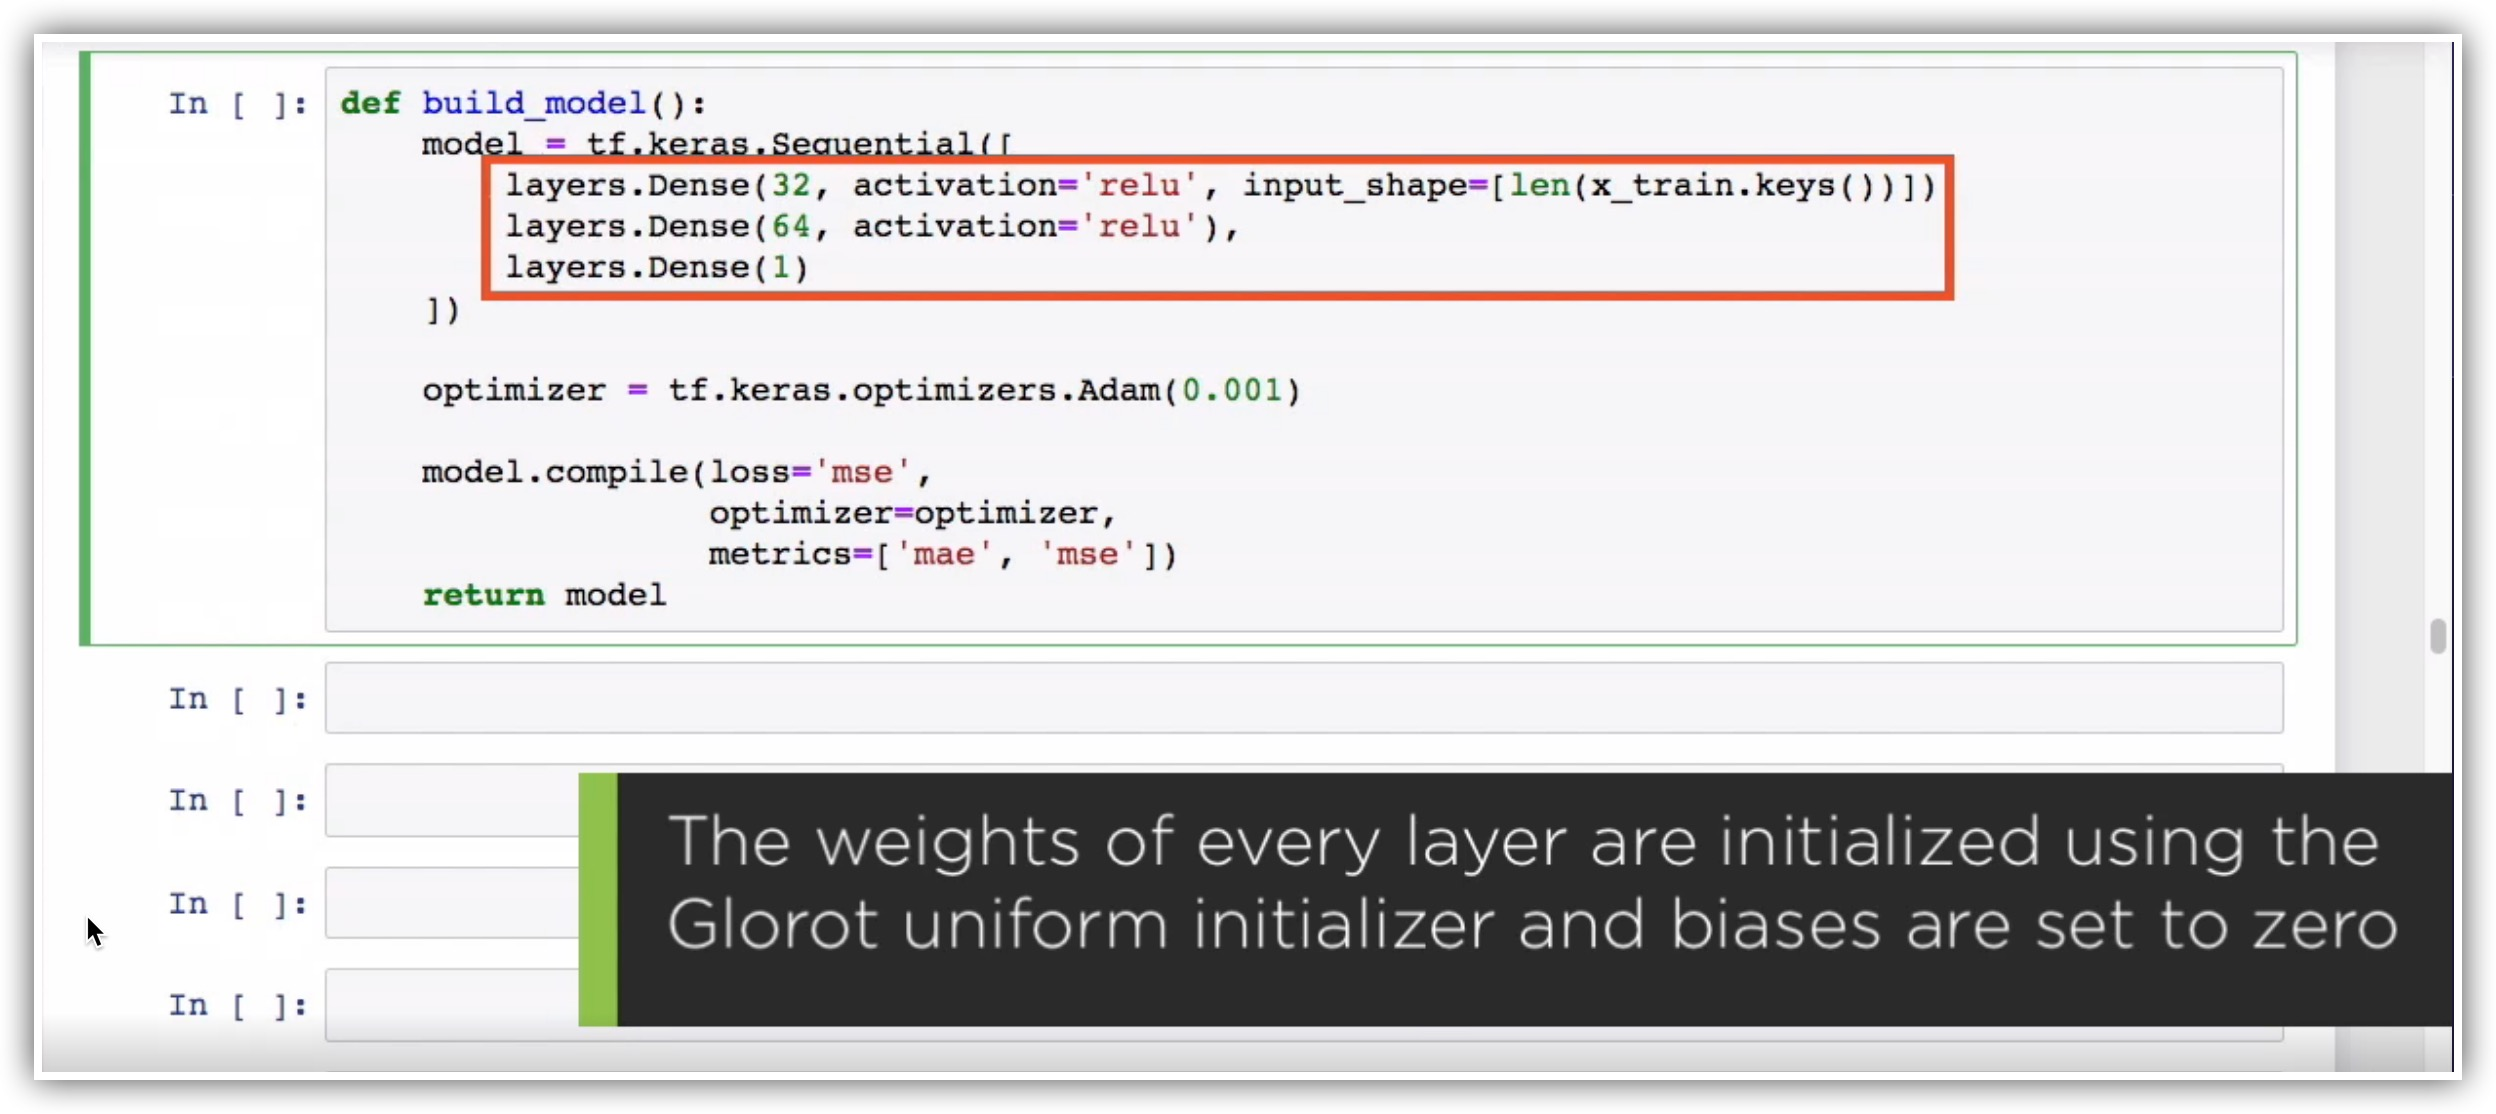

In [47]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-11-49.jpg')

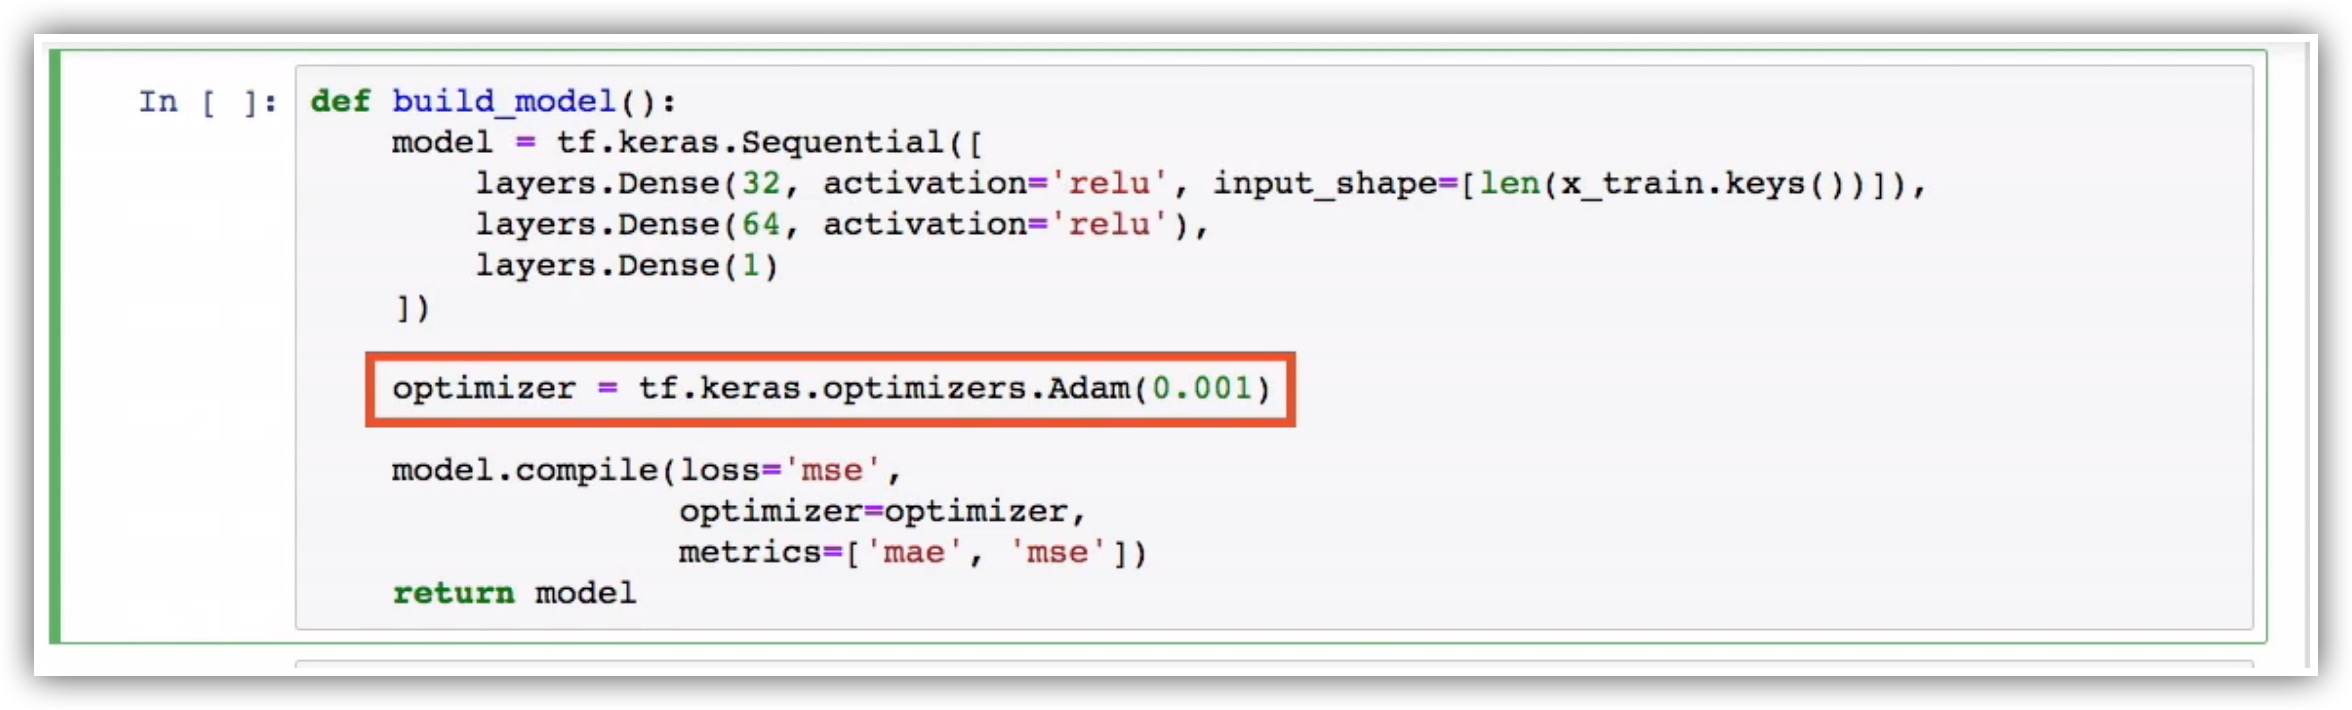

In [48]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-14-18.jpg')

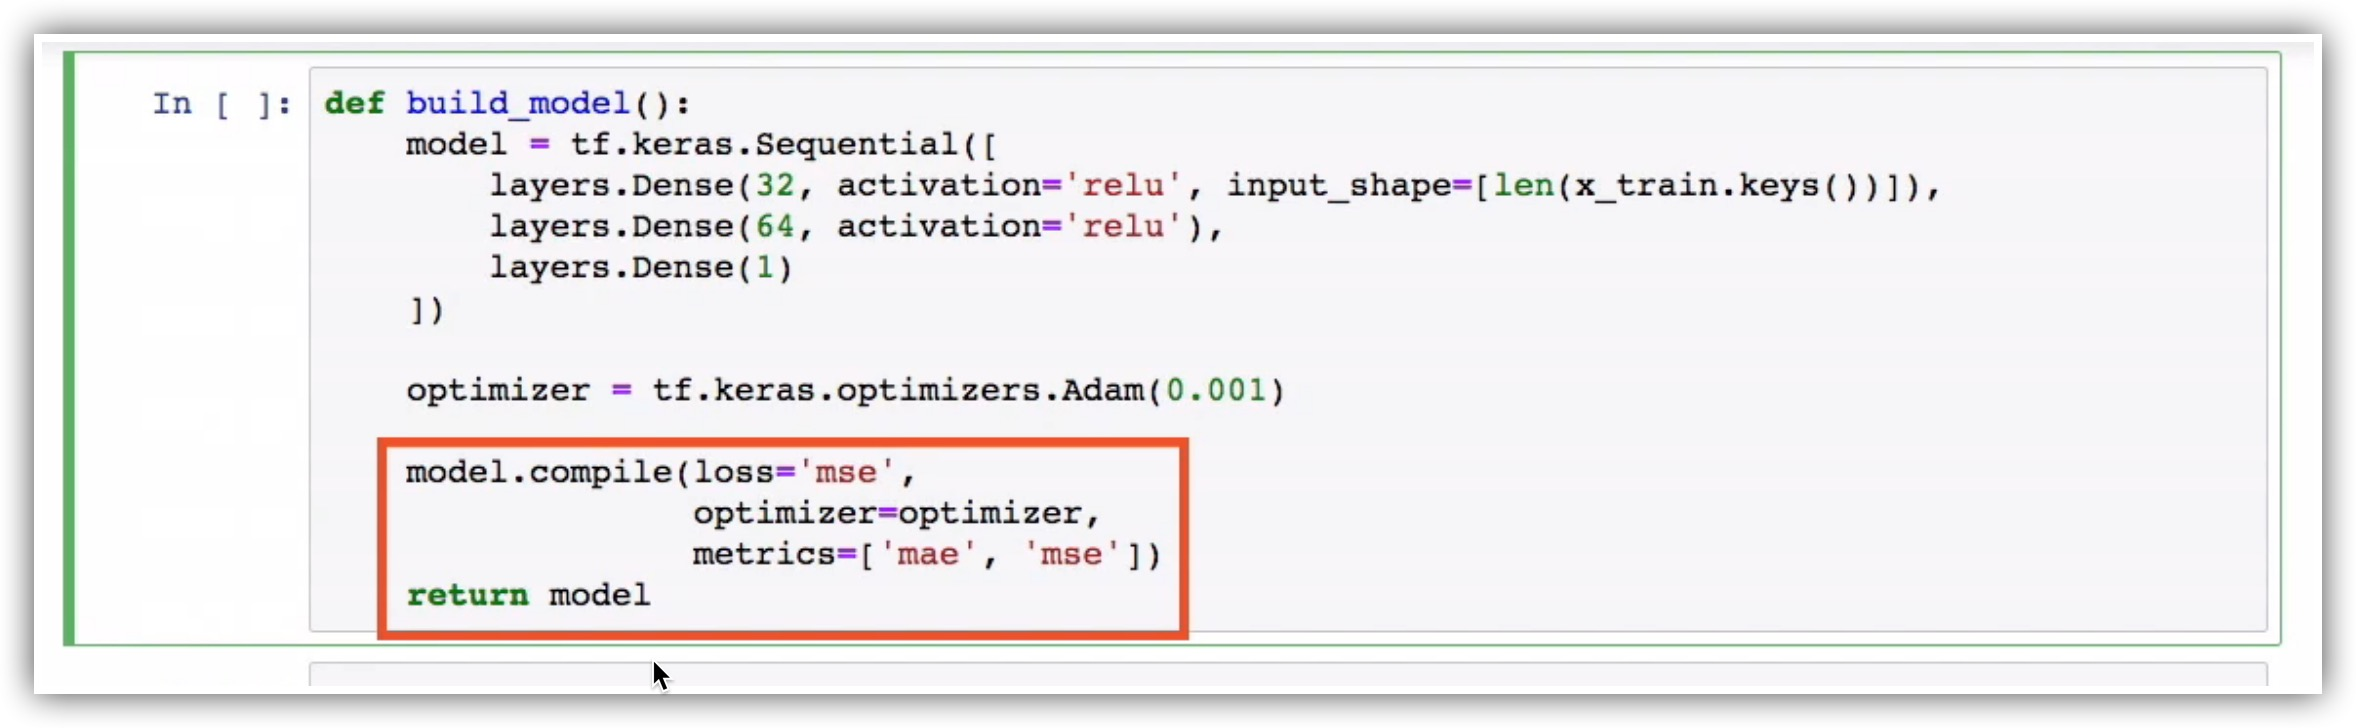

In [49]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-15-57.jpg')

In [50]:
'''
Once we have this helper function defined, let's go ahead and construct our first model. 
This is the model_relu_64 using build_model. 

The summary function on a Keras model gives you a quick overview of the layers that are 
involved in the model and the number of trainable parameters. 

You can see that our sequential model has the name sequential. 
It has three dense layers; dense, dense_1, dense_2. 

The summary also displays the number of trainable parameters in each layer and the total number 
of trainable parameters.

The more parameters your model has, the longer it'll take to train.
'''

model_relu_64 = build_model()
model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


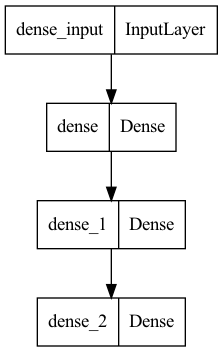

In [53]:
'''
Even better than the model summary is to see a visual representation of your model, and because we have 
pydot and graphviz installed, we can use keras.utils.plot_model in order to see a visual representation 
of each layer. We'll also save this out to a PNG file.

And here are the stack layers that make up our neural network model. We have the input layer where we feed in our features, 
then three dense layers and their names.
'''

keras.utils.plot_model(model_relu_64, 'model_relu_64.png')

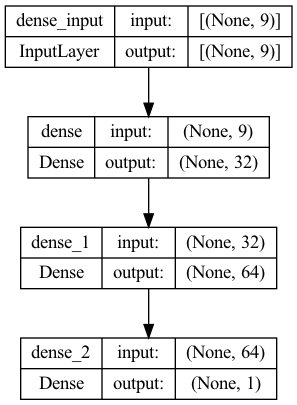

In [55]:
'''
Now, if you want to see the shapes of the input and the number of neurons in each layer, 
you can set show_shapes to True. 

This time, the visualization shows you how the shape of your data changes as it flows through the 
neural network layers. 

We start off with 9 features in our input layer, then the first dense layer has 32 neurons, 
so the output of the first dense layer has 32 features, which are then fed into dense_1. 

Our second dense layer, the output has 64 features, and the final dense layer has an output with just one feature,
 which is our prediction. 

 The question mark here in the shape of the data refers to the batch size that we've chosen, 
 the number of records that we feed in at one time during the training of this machine learning model. 
'''
keras.utils.plot_model(model_relu_64, 'model_relu_64_shapes.png', show_shapes=True)

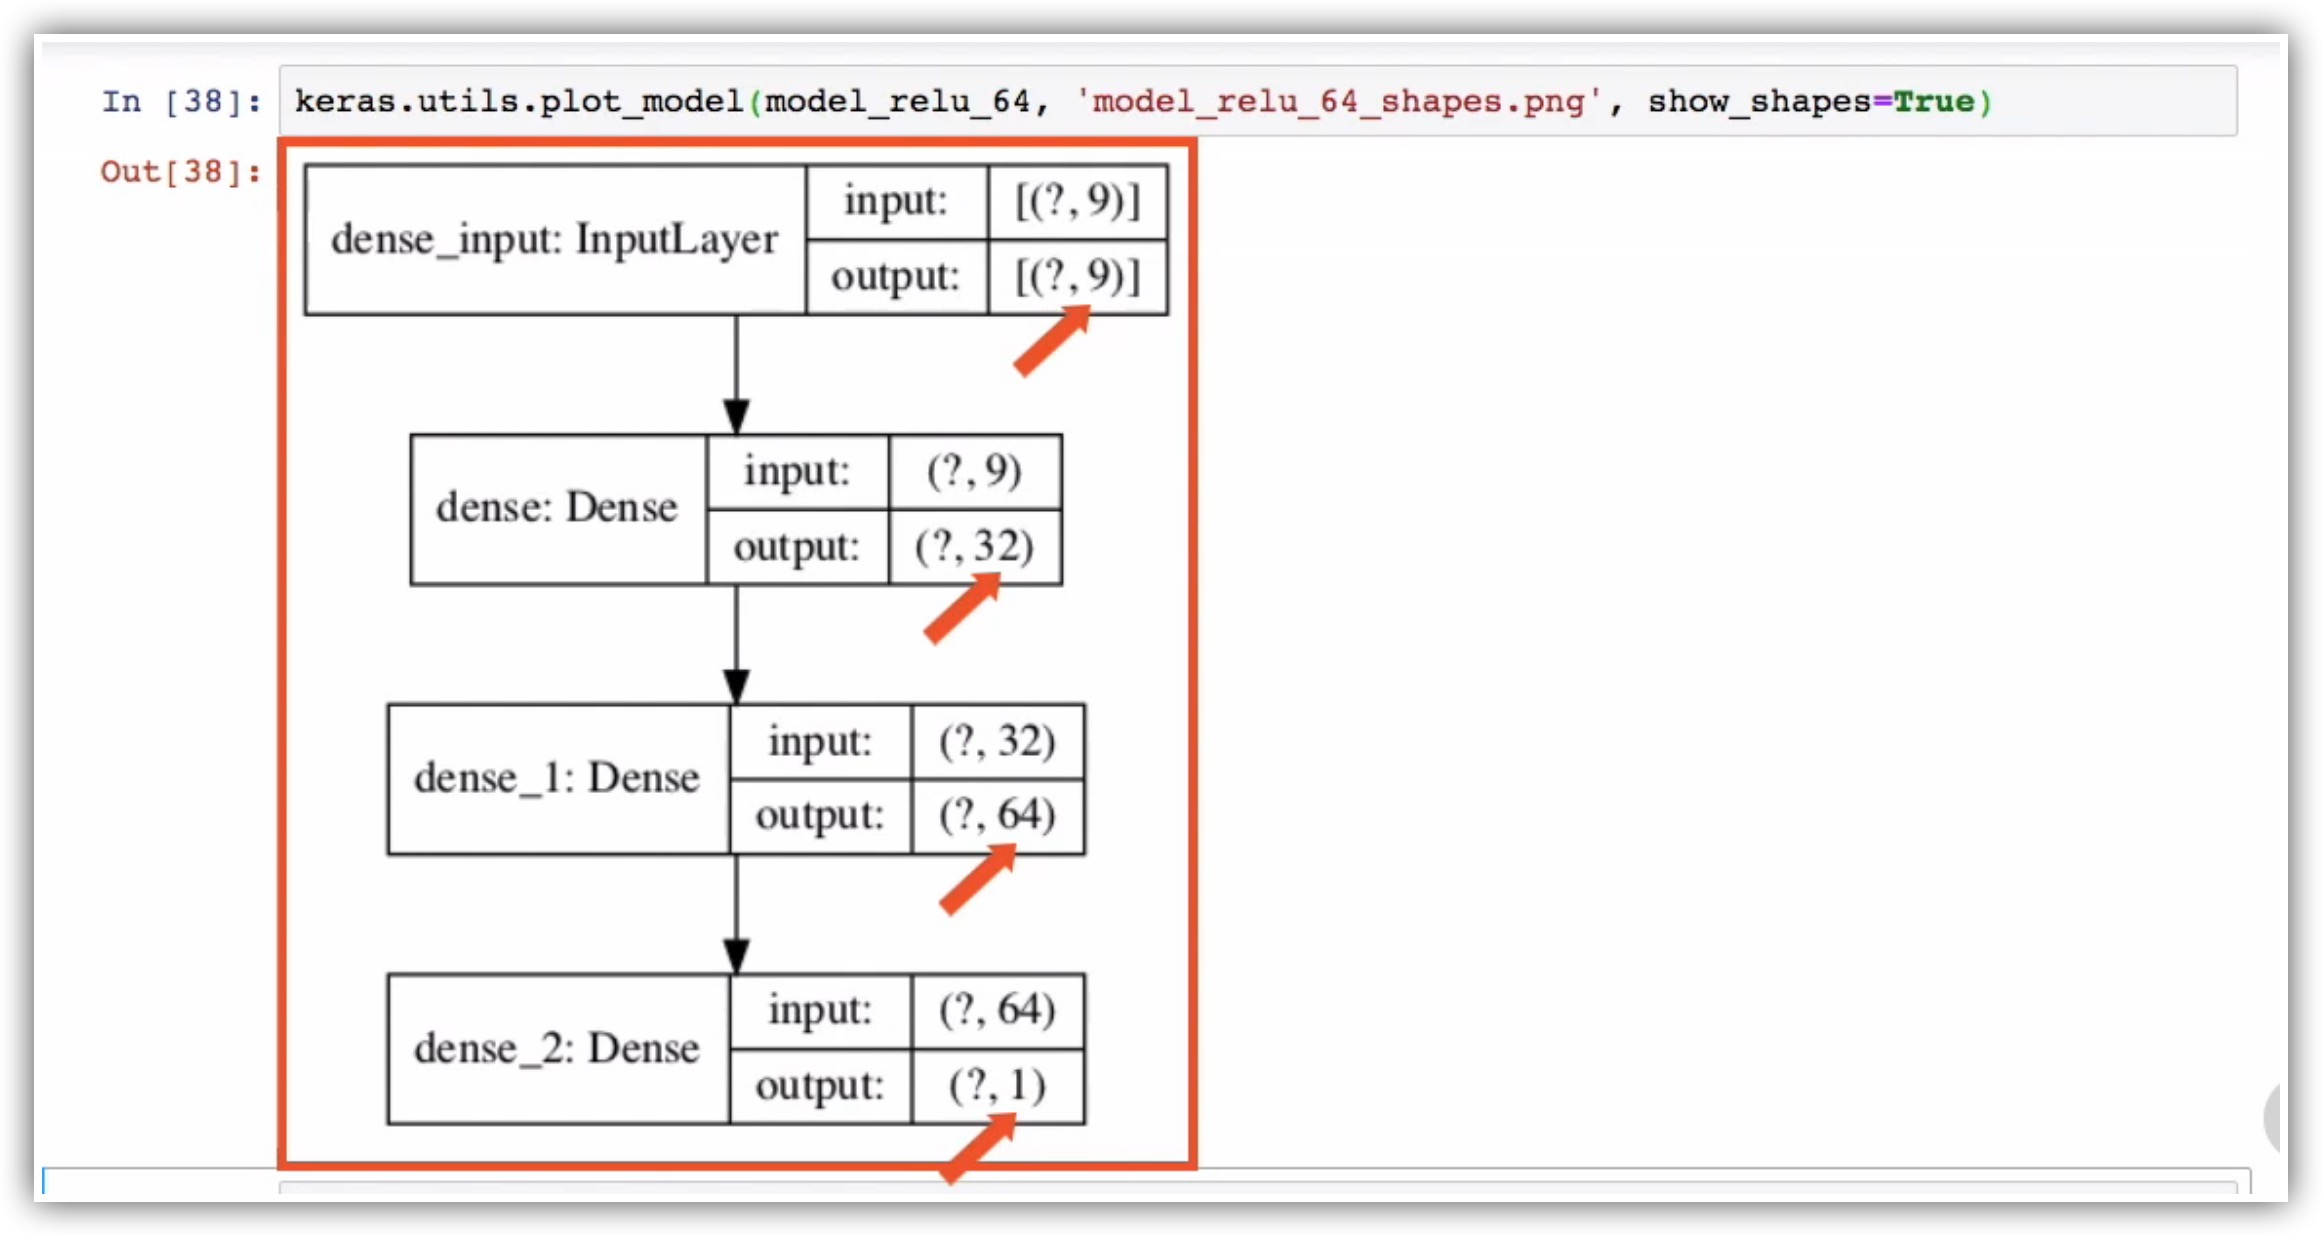

In [56]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-23-23.jpg')

In [57]:
'''
Now, plot model has saved all of these visualizations out as PNG files in our current working directory. 
'''
!ls *.png

model_relu_64.png        model_relu_64_1.png      model_relu_64_shapes.png


In [60]:
'''
Now that we have our basic regression model set up, we are ready to run training. 
We'll train for 1000 epochs. 
This is, of course, something that you can tweak.

Now, training a model built using the Keras API is very straightforward. 
You can simply invoke the fit function and pass in input parameters. 

The fit function accepts your training data in the form of numpy arrays, as well as TensorFlow data sets. 

The fit method splits your data into batches and trains for the number of epochs that you've specified. 
You can also specify a particular batch size if you want to. 

Our training data in this example is in the form of a numpy arrays, and when you've used numpy arrays, 
you can specify a validation_split to monitor your model on validation data. 
We're using 20% of the training data to validate our model.
'''

n_epochs = 1000
training_hist=model_relu_64.fit(X_train, 
                                y_train, 
                                epochs=n_epochs, 
                                validation_split=0.2, 
                                verbose=True)

Epoch 1/1000
27/27 [==============================] - 1s 9ms/step - loss: 317067264.0000 - mae: 13317.9102 - mse: 317067264.0000 - val_loss: 336120096.0000 - val_mae: 12877.3525 - val_mse: 336120096.0000
Epoch 2/1000
27/27 [==============================] - 0s 3ms/step - loss: 317033888.0000 - mae: 13316.6963 - mse: 317033888.0000 - val_loss: 336073216.0000 - val_mae: 12875.5635 - val_mse: 336073152.0000
Epoch 3/1000
27/27 [==============================] - 0s 2ms/step - loss: 316959616.0000 - mae: 13313.9531 - mse: 316959616.0000 - val_loss: 335960608.0000 - val_mae: 12871.3711 - val_mse: 335960608.0000
Epoch 4/1000
27/27 [==============================] - 0s 3ms/step - loss: 316791776.0000 - mae: 13308.0723 - mse: 316791776.0000 - val_loss: 335718528.0000 - val_mae: 12862.5957 - val_mse: 335718528.0000
Epoch 5/1000
27/27 [==============================] - 0s 2ms/step - loss: 316458752.0000 - mae: 13296.4287 - mse: 316458752.0000 - val_loss: 335253888.0000 - val_mae: 12846.2090 - val_

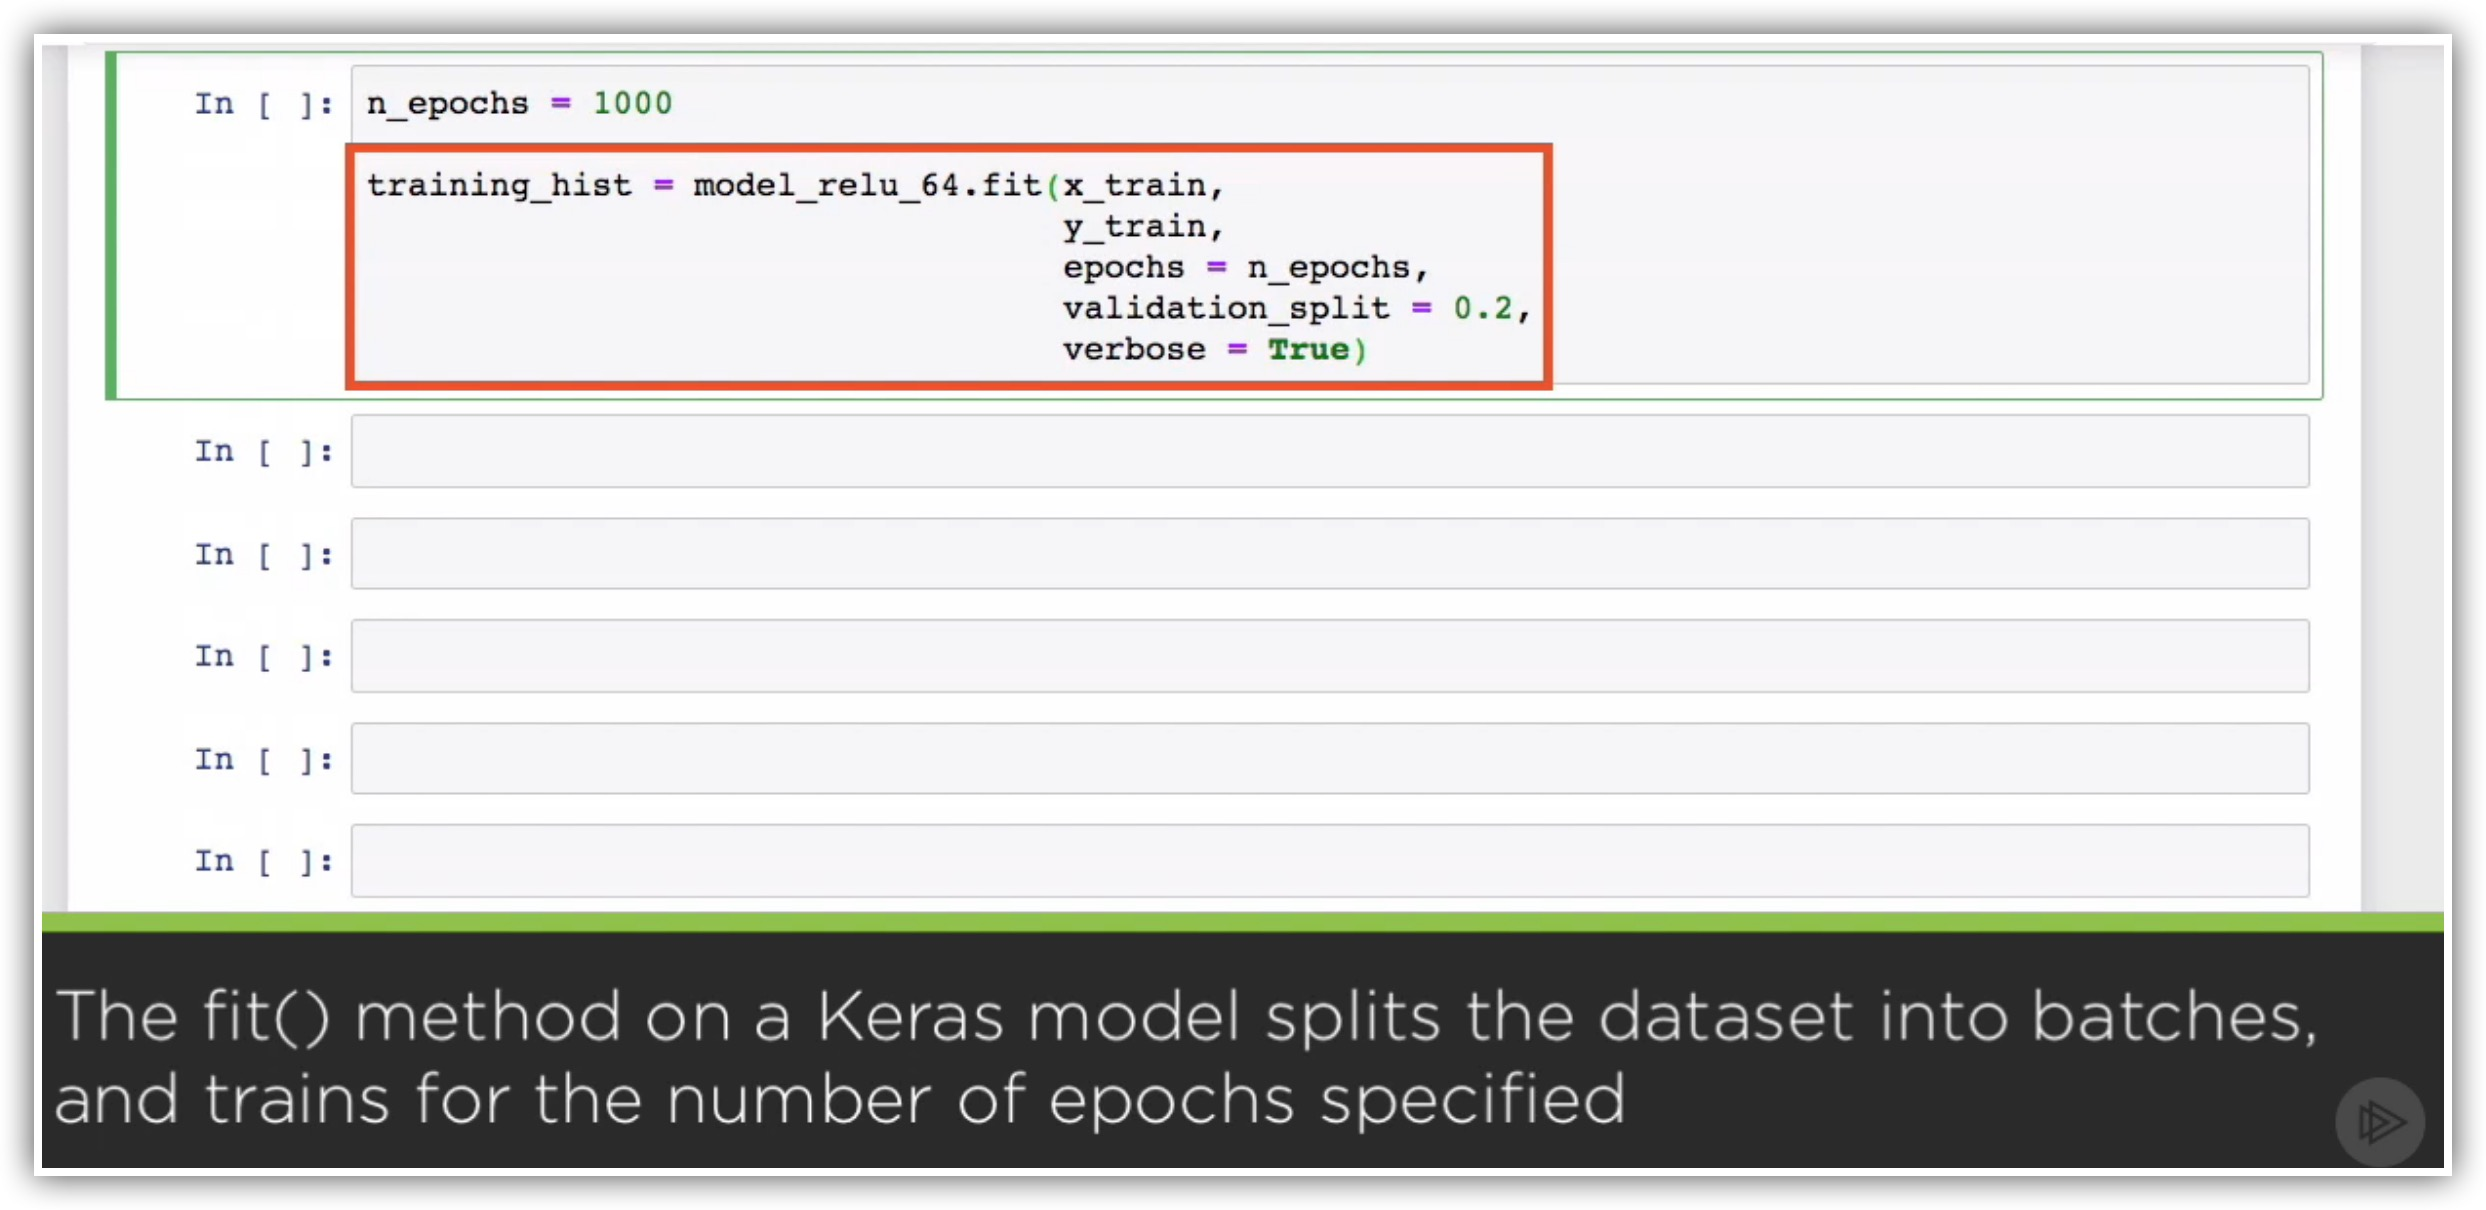

In [58]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-29-12.jpg')

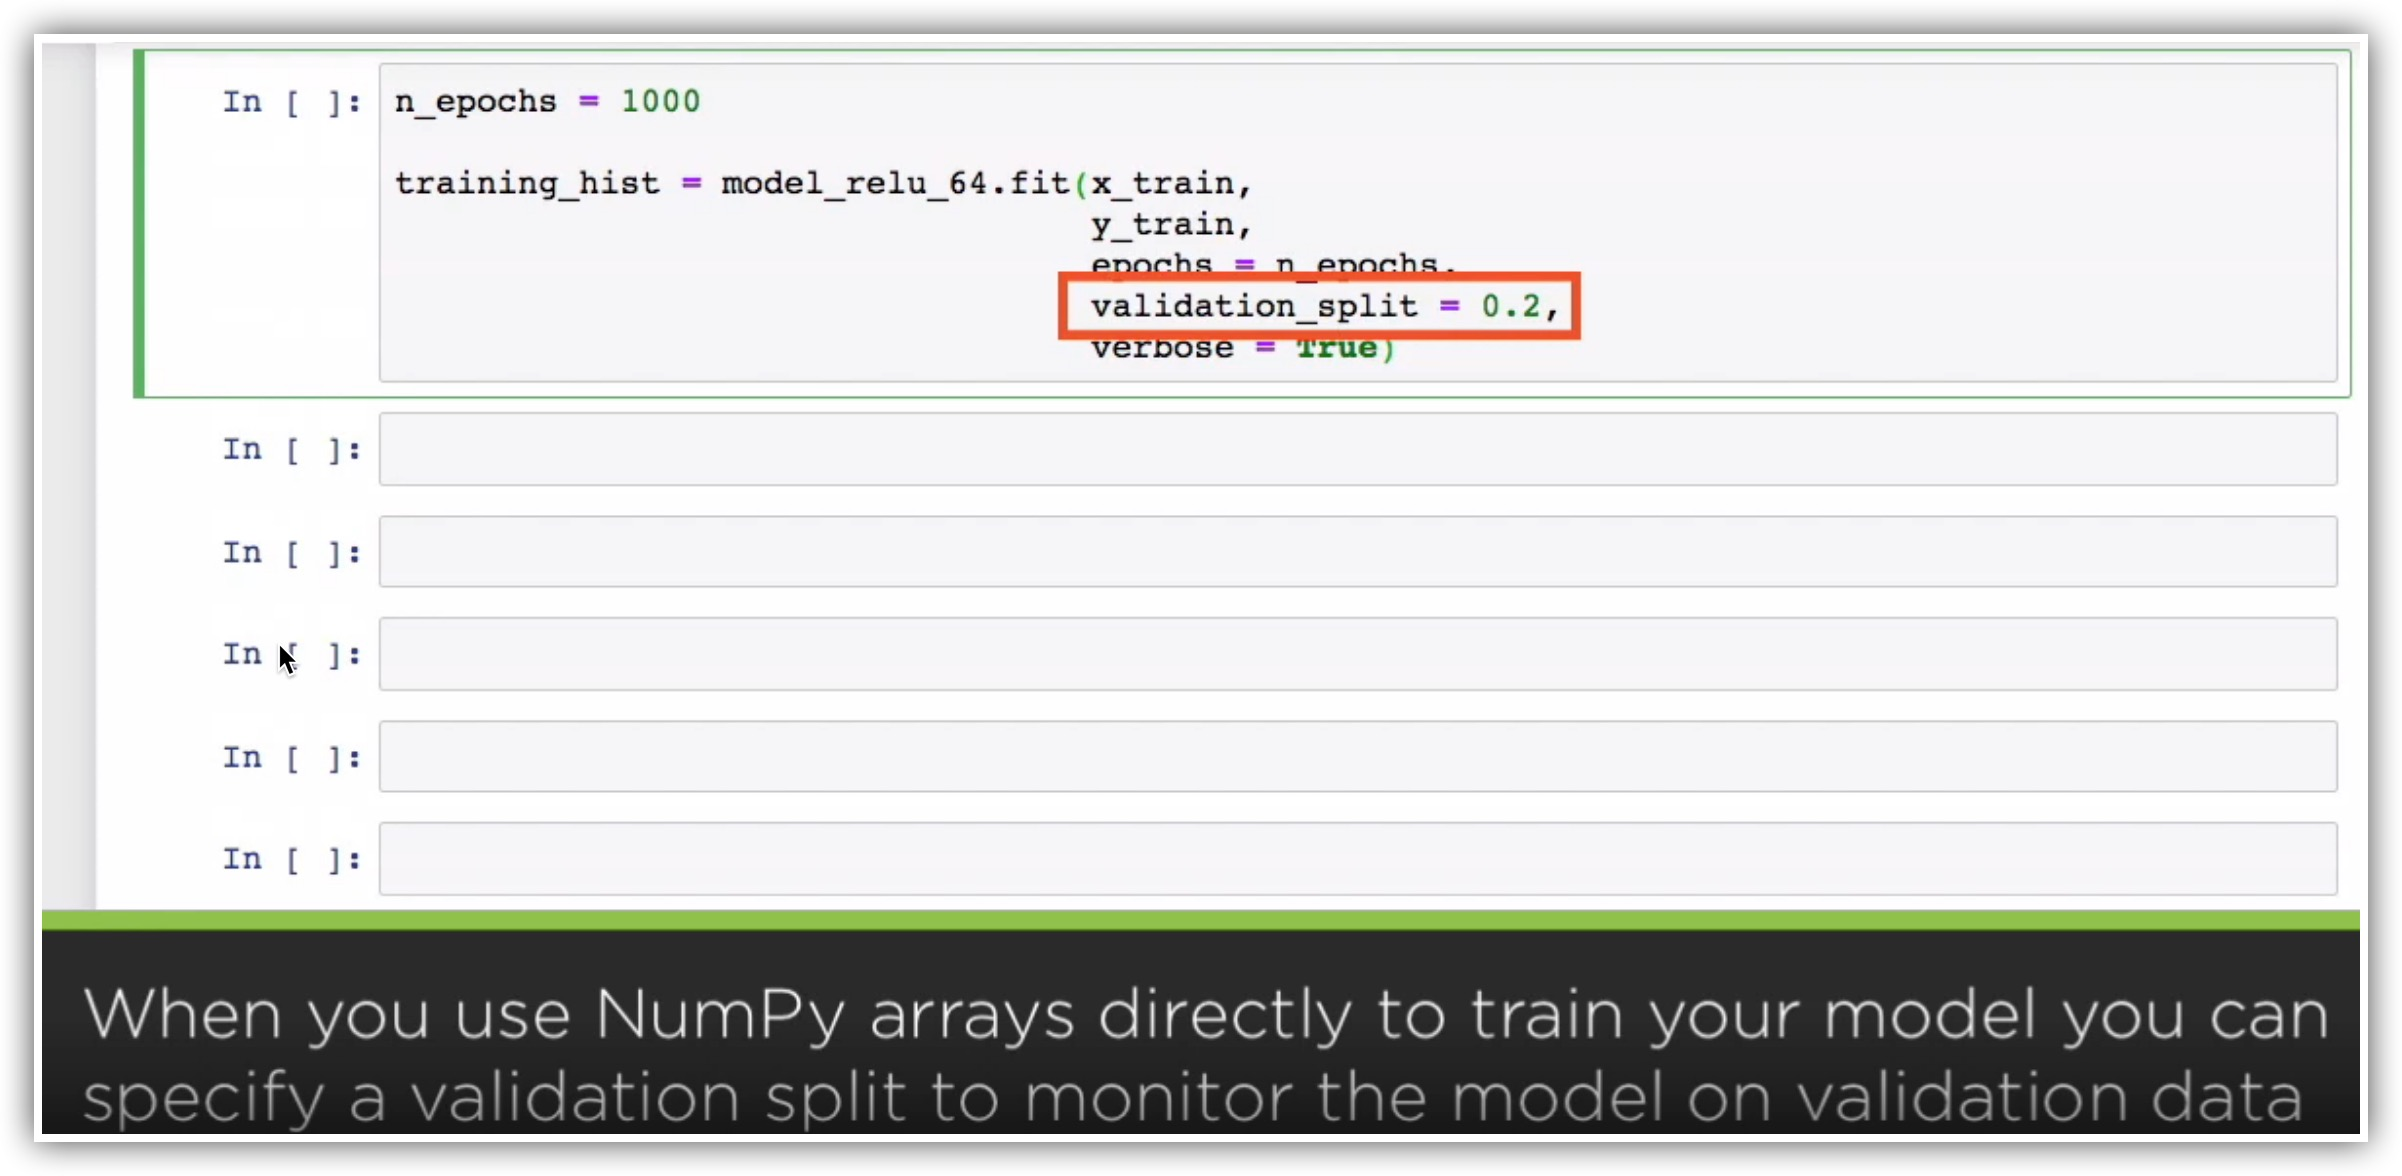

In [59]:
'''

'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-30-09.jpg')

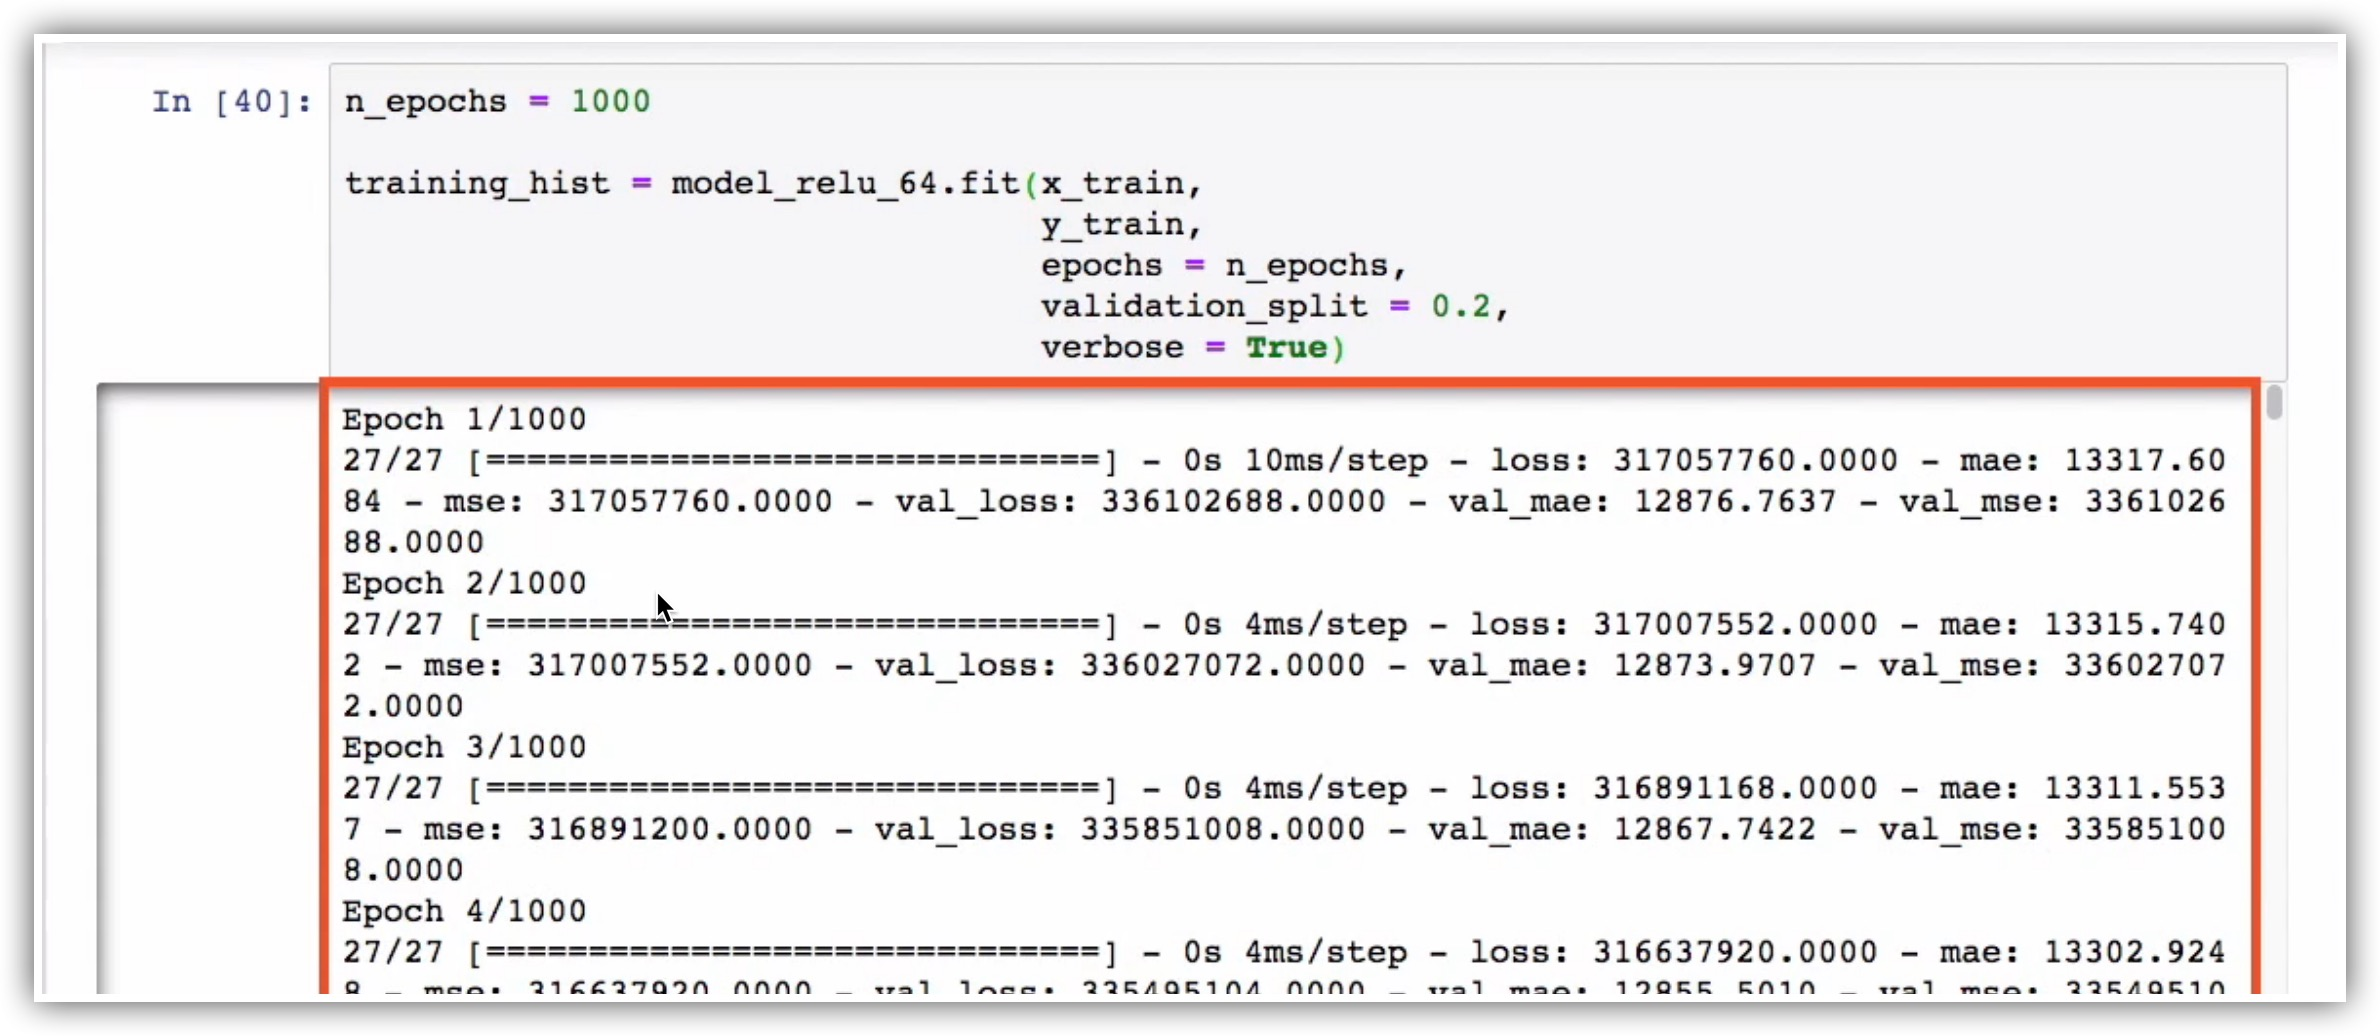

In [61]:
'''
start the training process of your model, and for each epoch, you can see that Keras prints out the loss, 
the MAE, and the MSE on your training data, as well as the validation data. 
We train all the way through to 1000 epochs, and at the end we have the final value for loss, 
mean absolute error, and mean square error. 
'''
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_13-31-06.jpg')

In [63]:
'''
We've stored the results of this training process in a variable that is training_hist. 
The history property will allow us to see how the various metrics of our model change over the 
course of the training process, and this is what we are going to visualize. 

In this data frame, I'll also set up a column for the epochs of training. 

Let's take a look at the contents of this data frame, and you can see at the very end near 1000 epochs, 
these are the values of the various metrics that we monitor for this model. 
'''

training_hist_df = pd.DataFrame(training_hist.history)
training_hist_df['epoch'] = training_hist.epoch
DisplayMatrix(training_hist_df.tail())

╔═════╦═════════════╦═════════╦═════════════╦═════════════╦═══════════╦═════════════╦═════════╗
║     ║        loss ║     mae ║         mse ║    val_loss ║   val_mae ║     val_mse ║   epoch ║
╠═════╬═════════════╬═════════╬═════════════╬═════════════╬═══════════╬═════════════╬═════════╣
║ 995 ║ 2.05786e+07 ║ 2667.11 ║ 2.05786e+07 ║ 2.14767e+07 ║   2633.98 ║ 2.14767e+07 ║     995 ║
╠═════╬═════════════╬═════════╬═════════════╬═════════════╬═══════════╬═════════════╬═════════╣
║ 996 ║ 2.05997e+07 ║ 2693.1  ║ 2.05997e+07 ║ 2.15621e+07 ║   2672.29 ║ 2.15621e+07 ║     996 ║
╠═════╬═════════════╬═════════╬═════════════╬═════════════╬═══════════╬═════════════╬═════════╣
║ 997 ║ 2.05878e+07 ║ 2639.86 ║ 2.05878e+07 ║ 2.14597e+07 ║   2629.43 ║ 2.14597e+07 ║     997 ║
╠═════╬═════════════╬═════════╬═════════════╬═════════════╬═══════════╬═════════════╬═════════╣
║ 998 ║ 2.05712e+07 ║ 2683.18 ║ 2.05712e+07 ║ 2.15713e+07 ║   2675.21 ║ 2.15713e+07 ║     998 ║
╠═════╬═════════════╬═════════╬═════════

In [64]:
'''
Now it's possible for us to visualize these metrics, and I'll do so using a plotter available in tfdocs. 
The plotter will allow us to view results in our training_hist variable.

The validation data is represented using the dotted line. 

You can see that the MAE value falls during the training process and then levels out.

'''
plotter=tfdocs.plots.HistoryPlotter(smoothing_std=2)

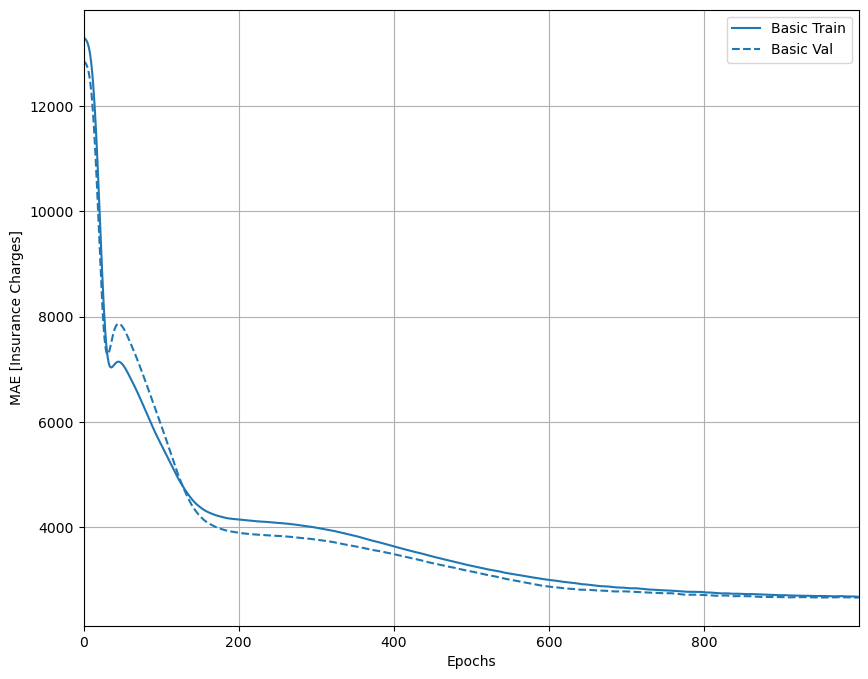

In [65]:
'''
I want to see how the mean absolute error changes, and the result is a visualization for the training data, 
as well as the validation data.
'''
plt.figure(figsize=(10, 8))
plotter.plot({'Basic': training_hist}, metric="mae")
plt.ylabel('MAE [Insurance Charges]')
plt.show()

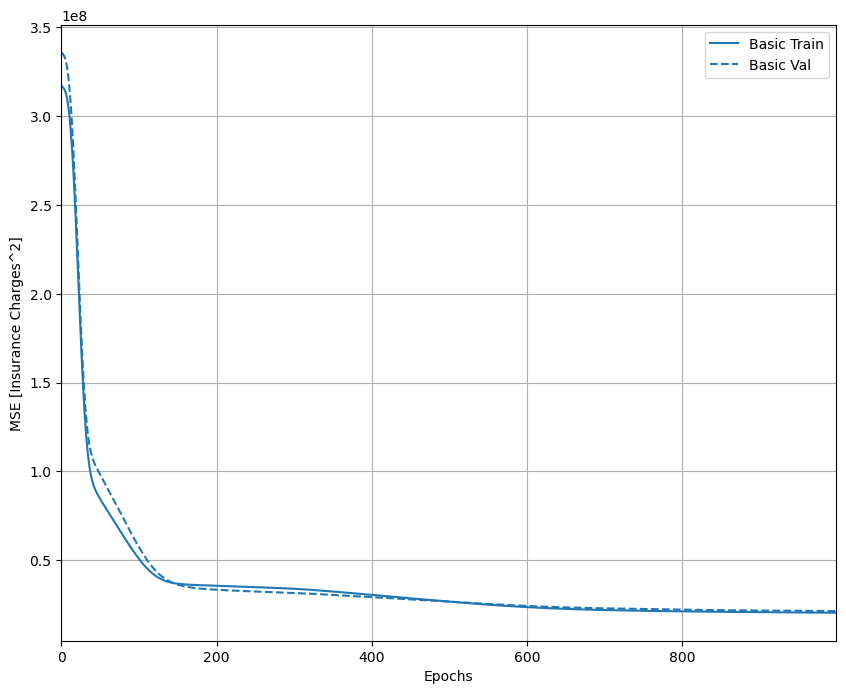

In [66]:
'''
Another metric that we monitored in the training process is the mean square error. 
This is the loss of our model. 

Let's take a look at this. For the training, as well as validation data, you can see that we start off 
at a high value, but we fall to the low final value very quickly. 

After about 400 or so epochs, you can see that the model doesn't really improve, 
but we still continue training all the way through to 1000 epochs
'''
plt.figure(figsize=(10, 8))
plotter.plot({'Basic': training_hist}, metric="mse")
plt.ylabel('MSE [Insurance Charges^2]')
plt.show()

9/9 [==============================] - 0s 1ms/step


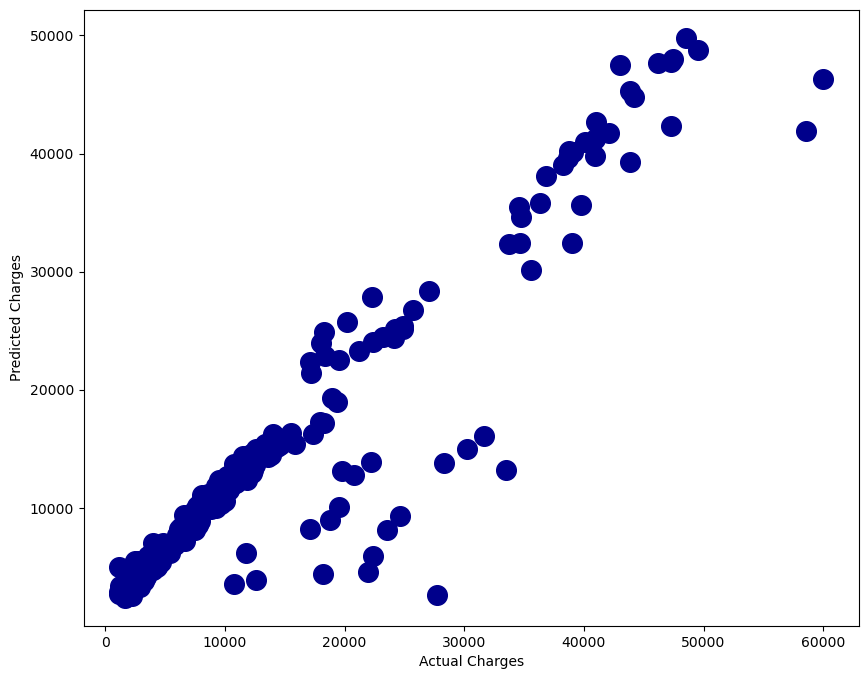

In [69]:
'''
Now that we have a fully trained regression model, we can use it for prediction by invoking the .predict function 
in our sequential model. 

I'm going to flatten out the prediction results and store it in y_pred. 
These are the predicted values from our model on the test data, that is, 
data the model hasn't encountered during training. 

I'm going to plot a scatter plot representation of actual values versus predicted values, 
and you can see from the scatter plot that our model does pretty well. 


'''

y_pred = model_relu_64.predict(X_test).flatten()
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred,s=200,c='darkblue')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [70]:
'''
An objective measure of this model, though, is the R square score. 

The R square score of the regression model measures how much of the underlying variance has been 
captured by our model, and an R square of 0.87 is quite good.
'''
r2_score(y_test, y_pred)

0.8751544838981037

In [75]:
'''
l. I'll use tf.keras.Sequential once again, but this time my model has three dense layers and a Dropout layer. 

The activation function that I have specified for the dense layers are also a little different. 
Instead of the relu activation, I've used the elu activation. 

The Exponential Linear Unit activation tends to converge faster and produce more accurate results 
as compared to the relu.

The elu activation also mitigates the problem of saturation of your neurons during the training process 
by getting the neurons to operate in their active region.

In addition to the dense layers that make up our neural network, I've also added in our Dropout layer with a 
dropout of 20%. 

The Dropout layer intentionally will turn off 20% of the neurons in our dense layer during the training process, 
thus forcing the active neurons in any iteration to learn more from the data. 

Dropout is what you use a neural networks to mitigate over fitting on your training data.

 We'll continue to use the Adam optimizer, and the metrics that we monitor also remain the same. 
 Call model.compile to configure your model.
'''

def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='elu', input_shape=[len(X_train.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation='elu'),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

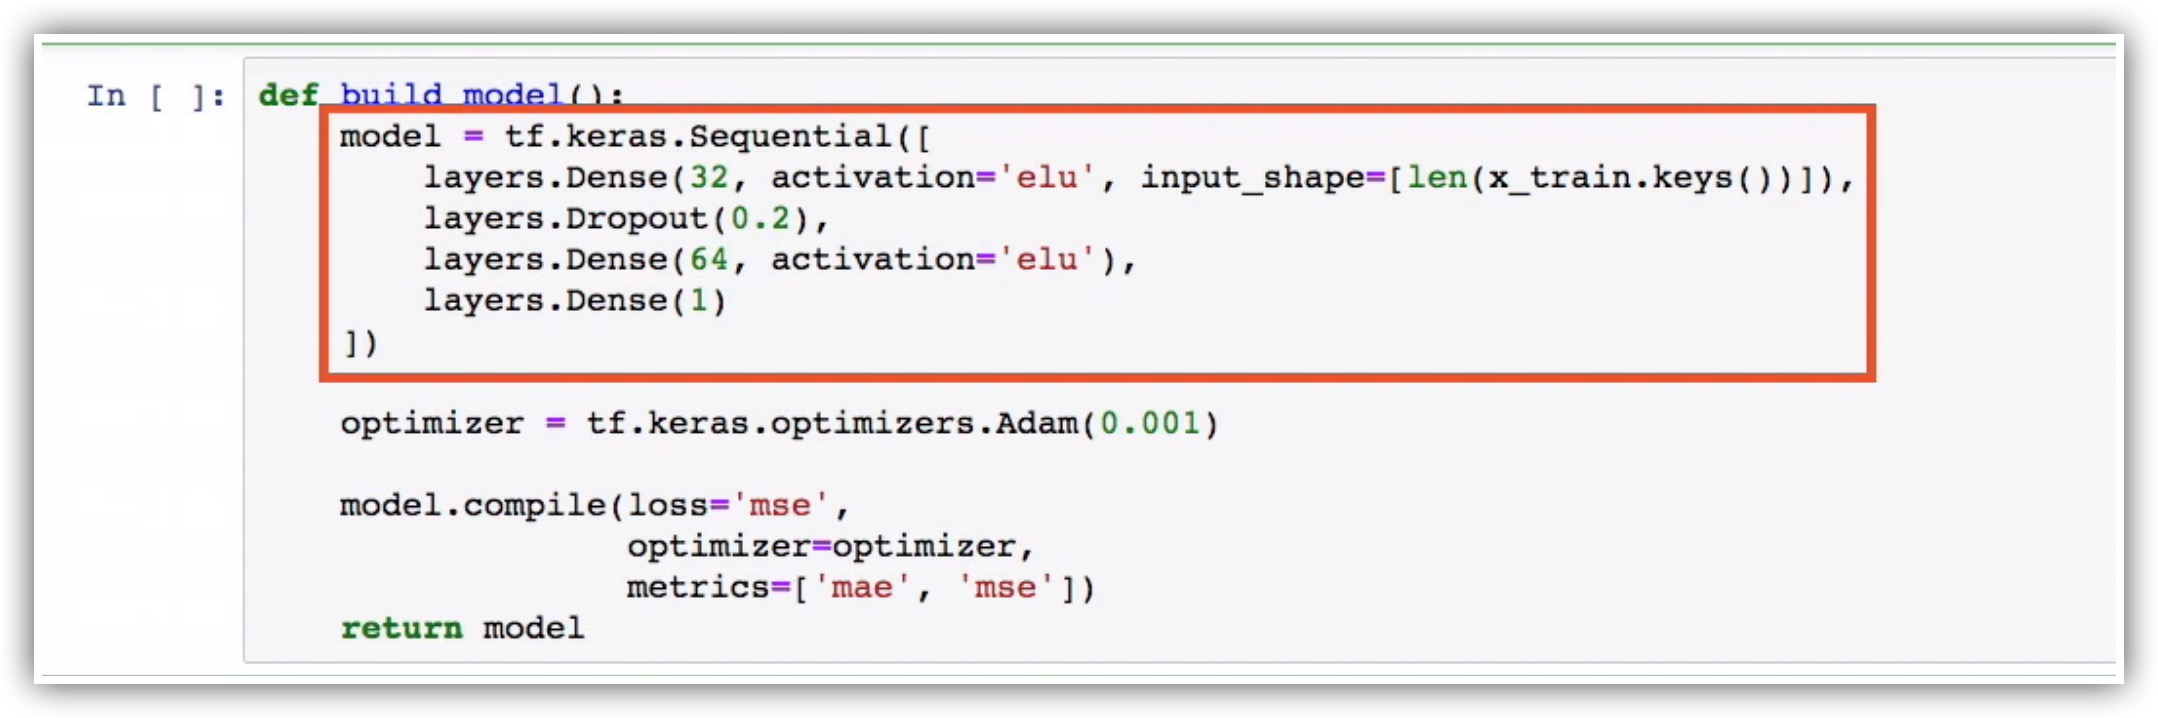

In [71]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_14-14-03.jpg')

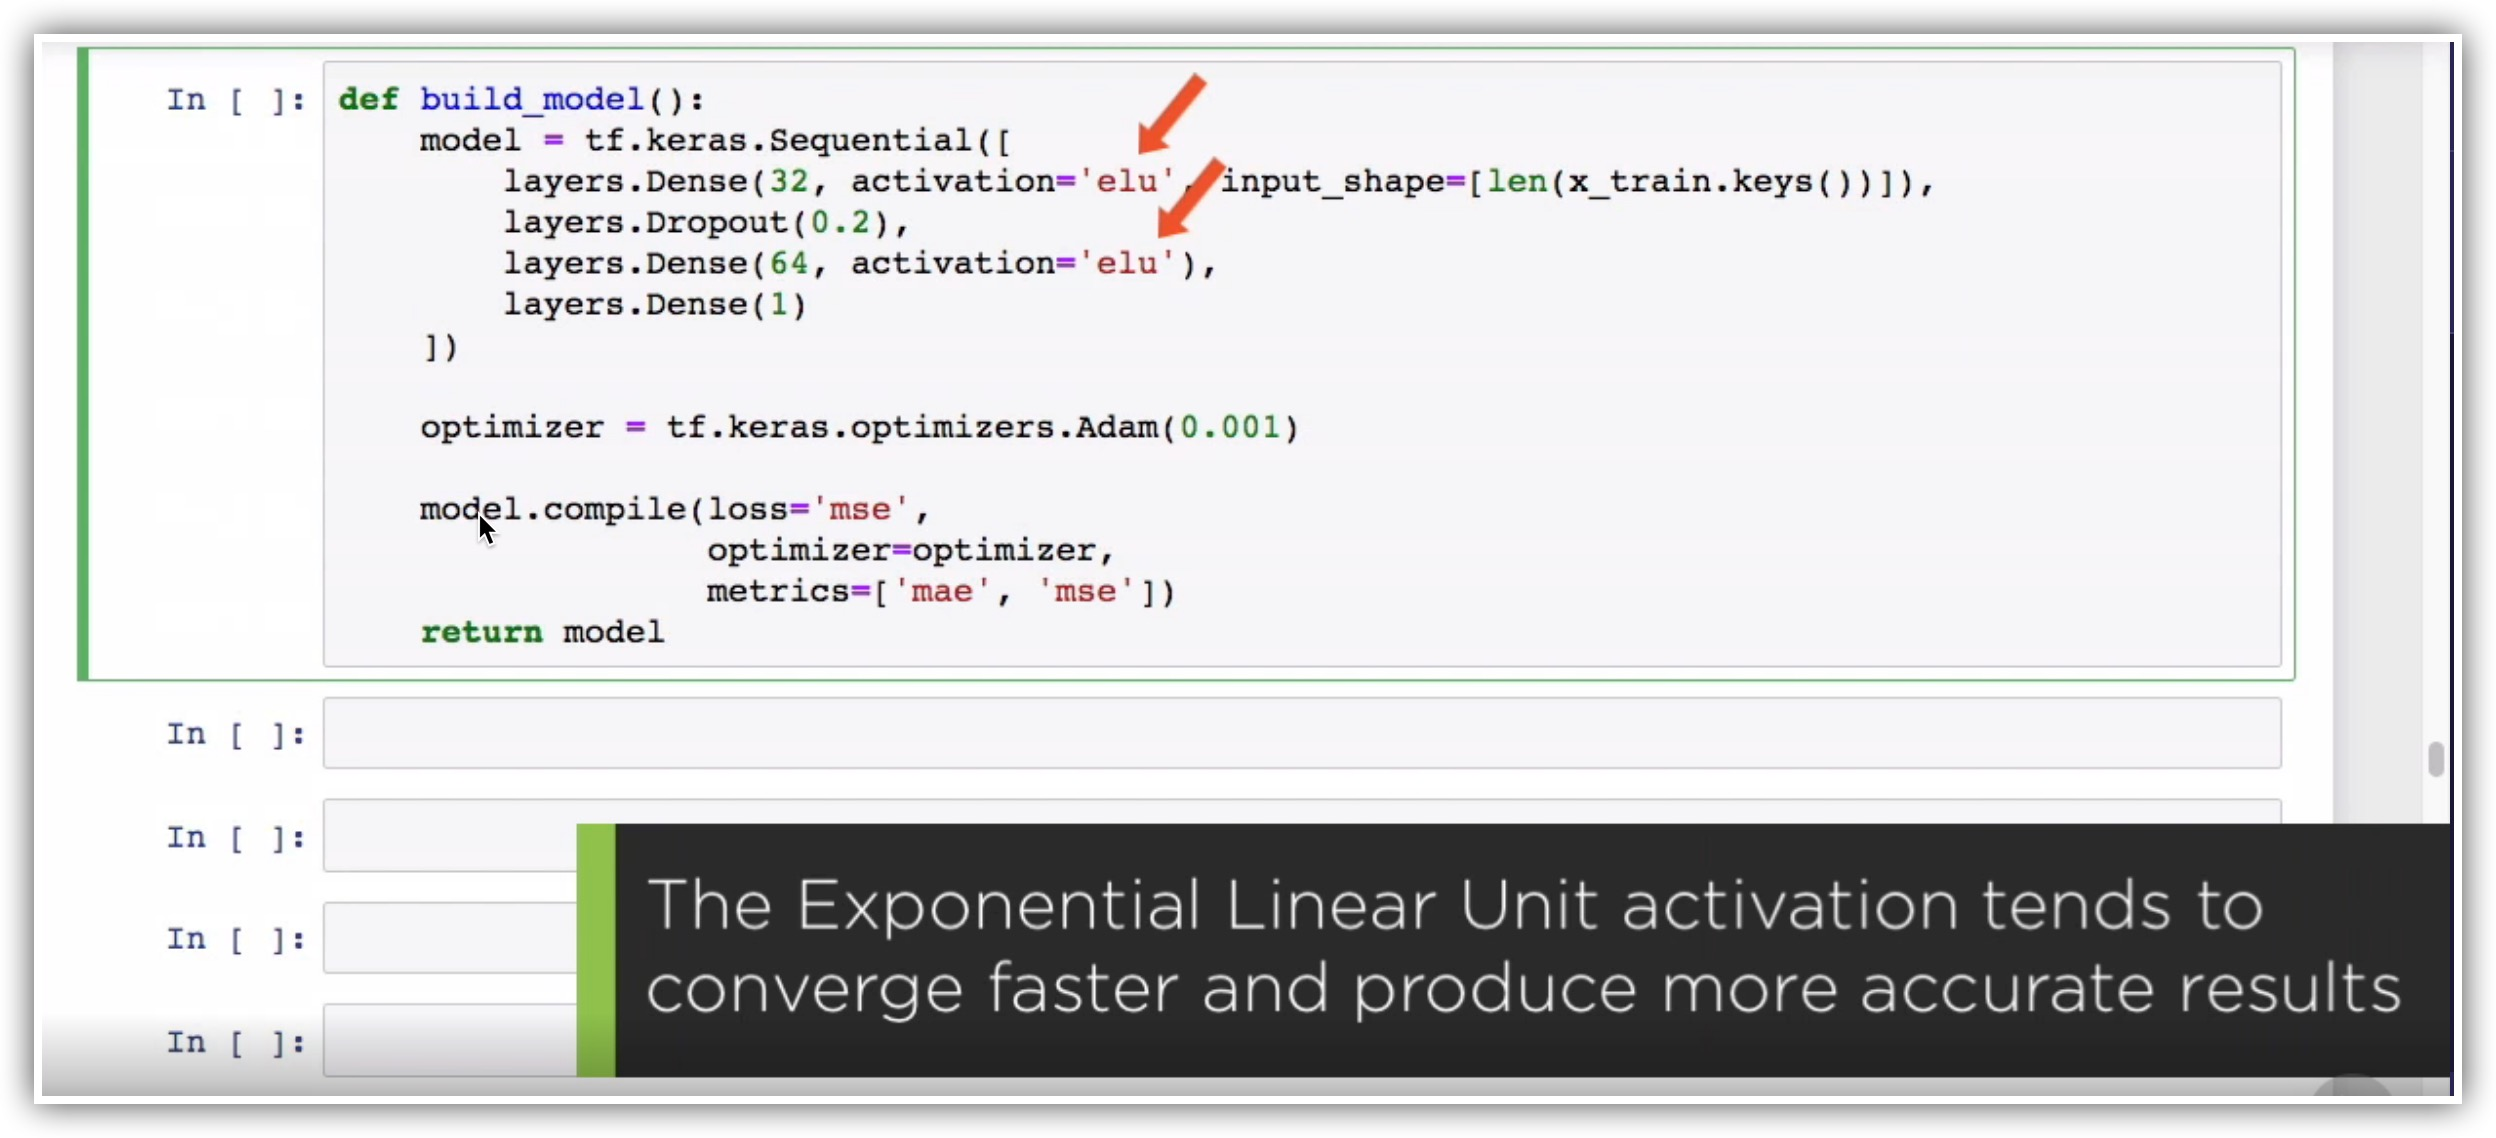

In [72]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_14-18-32.jpg')

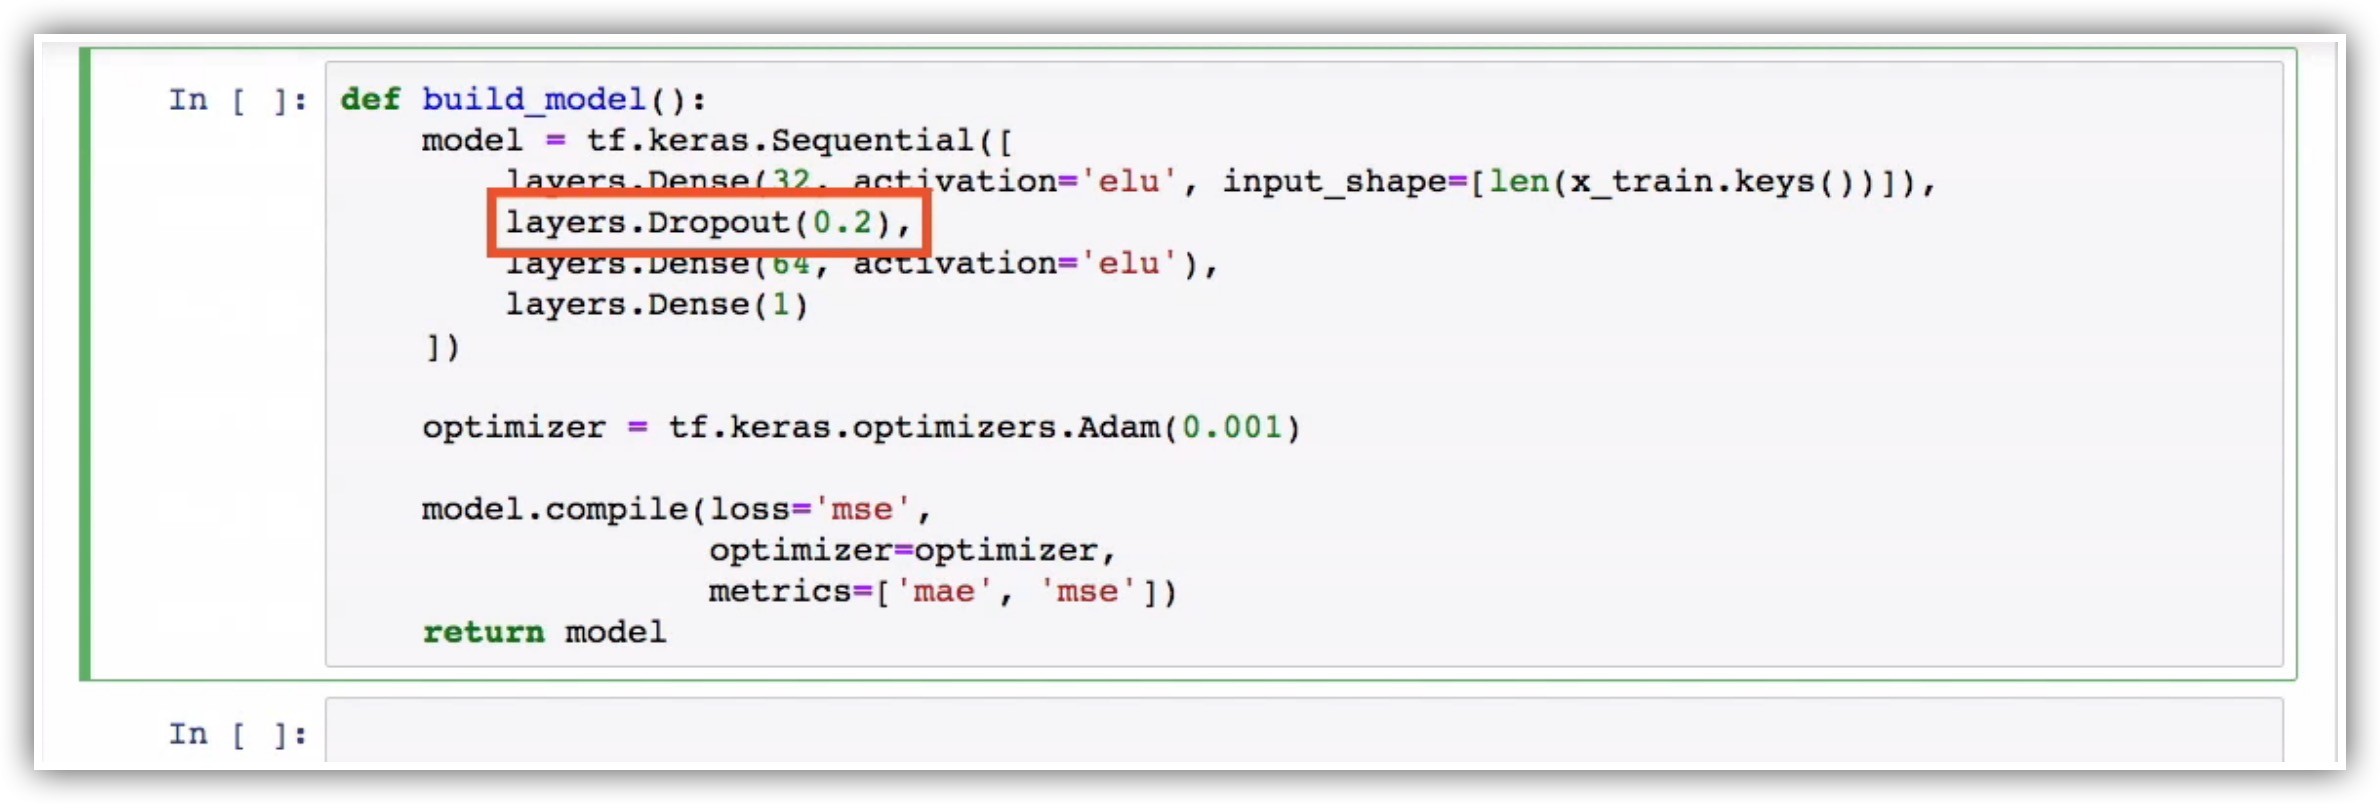

In [73]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_14-19-26.jpg')

In [76]:

'''
 Let's now build an elu_64 model using build_model, and here is a summary of our layers. 
 You can see the Dropout layer in there. 
'''
model_elu_64 = build_model()
model_elu_64.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                320       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


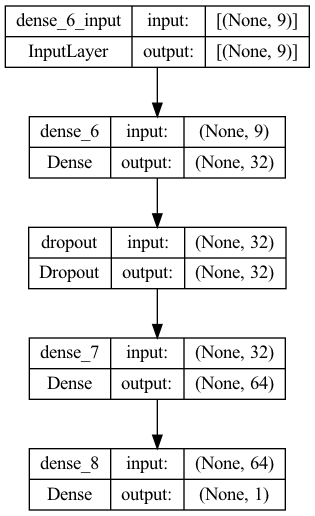

In [77]:
'''
Once again with the sequentially model, you can use keras.utils.plot_model to visualize the model 
and the shape of the data as it flows through the model. 
This is a useful tool in order to see how exactly a model has been set up. 
'''
keras.utils.plot_model(model_elu_64, "elu_64_model.png", show_shapes=True)

In [78]:
'''
Once again, we'll train the model using the fit function on a Keras model, which automatically batches 
the data and runs the training process. 

The one change that you might see here is that we have specified a value for the callbacks input argument. 

A callback is any object that you pass to a model to extend its behavior during the training process. 

Now you can specify your own custom callbacks, or there are a number of built‑in callbacks available in Keras.

Here I've used a callback from the tfdocs library, which allows me to visualize every epoch of 
training using EpochDots, as you see here. 

This particular callback simply changes how you visualize every epoch of training. 

I found this output much more succinct and much easier to read than the default output. 
'''

training_hist = model_elu_64.fit(X_train, 
                                 y_train, 
                                 epochs=1000, 
                                 validation_split=0.2, 
                                 verbose=False,
                                 callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317051200.0000,  mae:13317.4893,  mse:317051200.0000,  val_loss:336085728.0000,  val_mae:12876.4268,  val_mse:336085728.0000,  
....................................................................................................
Epoch: 100, loss:40933740.0000,  mae:4637.1816,  mse:40933740.0000,  val_loss:39551348.0000,  val_mae:4530.2100,  val_mse:39551348.0000,  
....................................................................................................
Epoch: 200, loss:31701716.0000,  mae:3743.3049,  mse:31701716.0000,  val_loss:24495692.0000,  val_mae:3075.5830,  val_mse:24495692.0000,  
....................................................................................................
Epoch: 300, loss:30396772.0000,  mae:3695.9226,  mse:30396772.0000,  val_loss:23677864.0000,  val_mae:2870.0613,  val_mse:23677864.0000,  
....................................................................................................
Epoch: 400, loss:29737870.0000,  ma

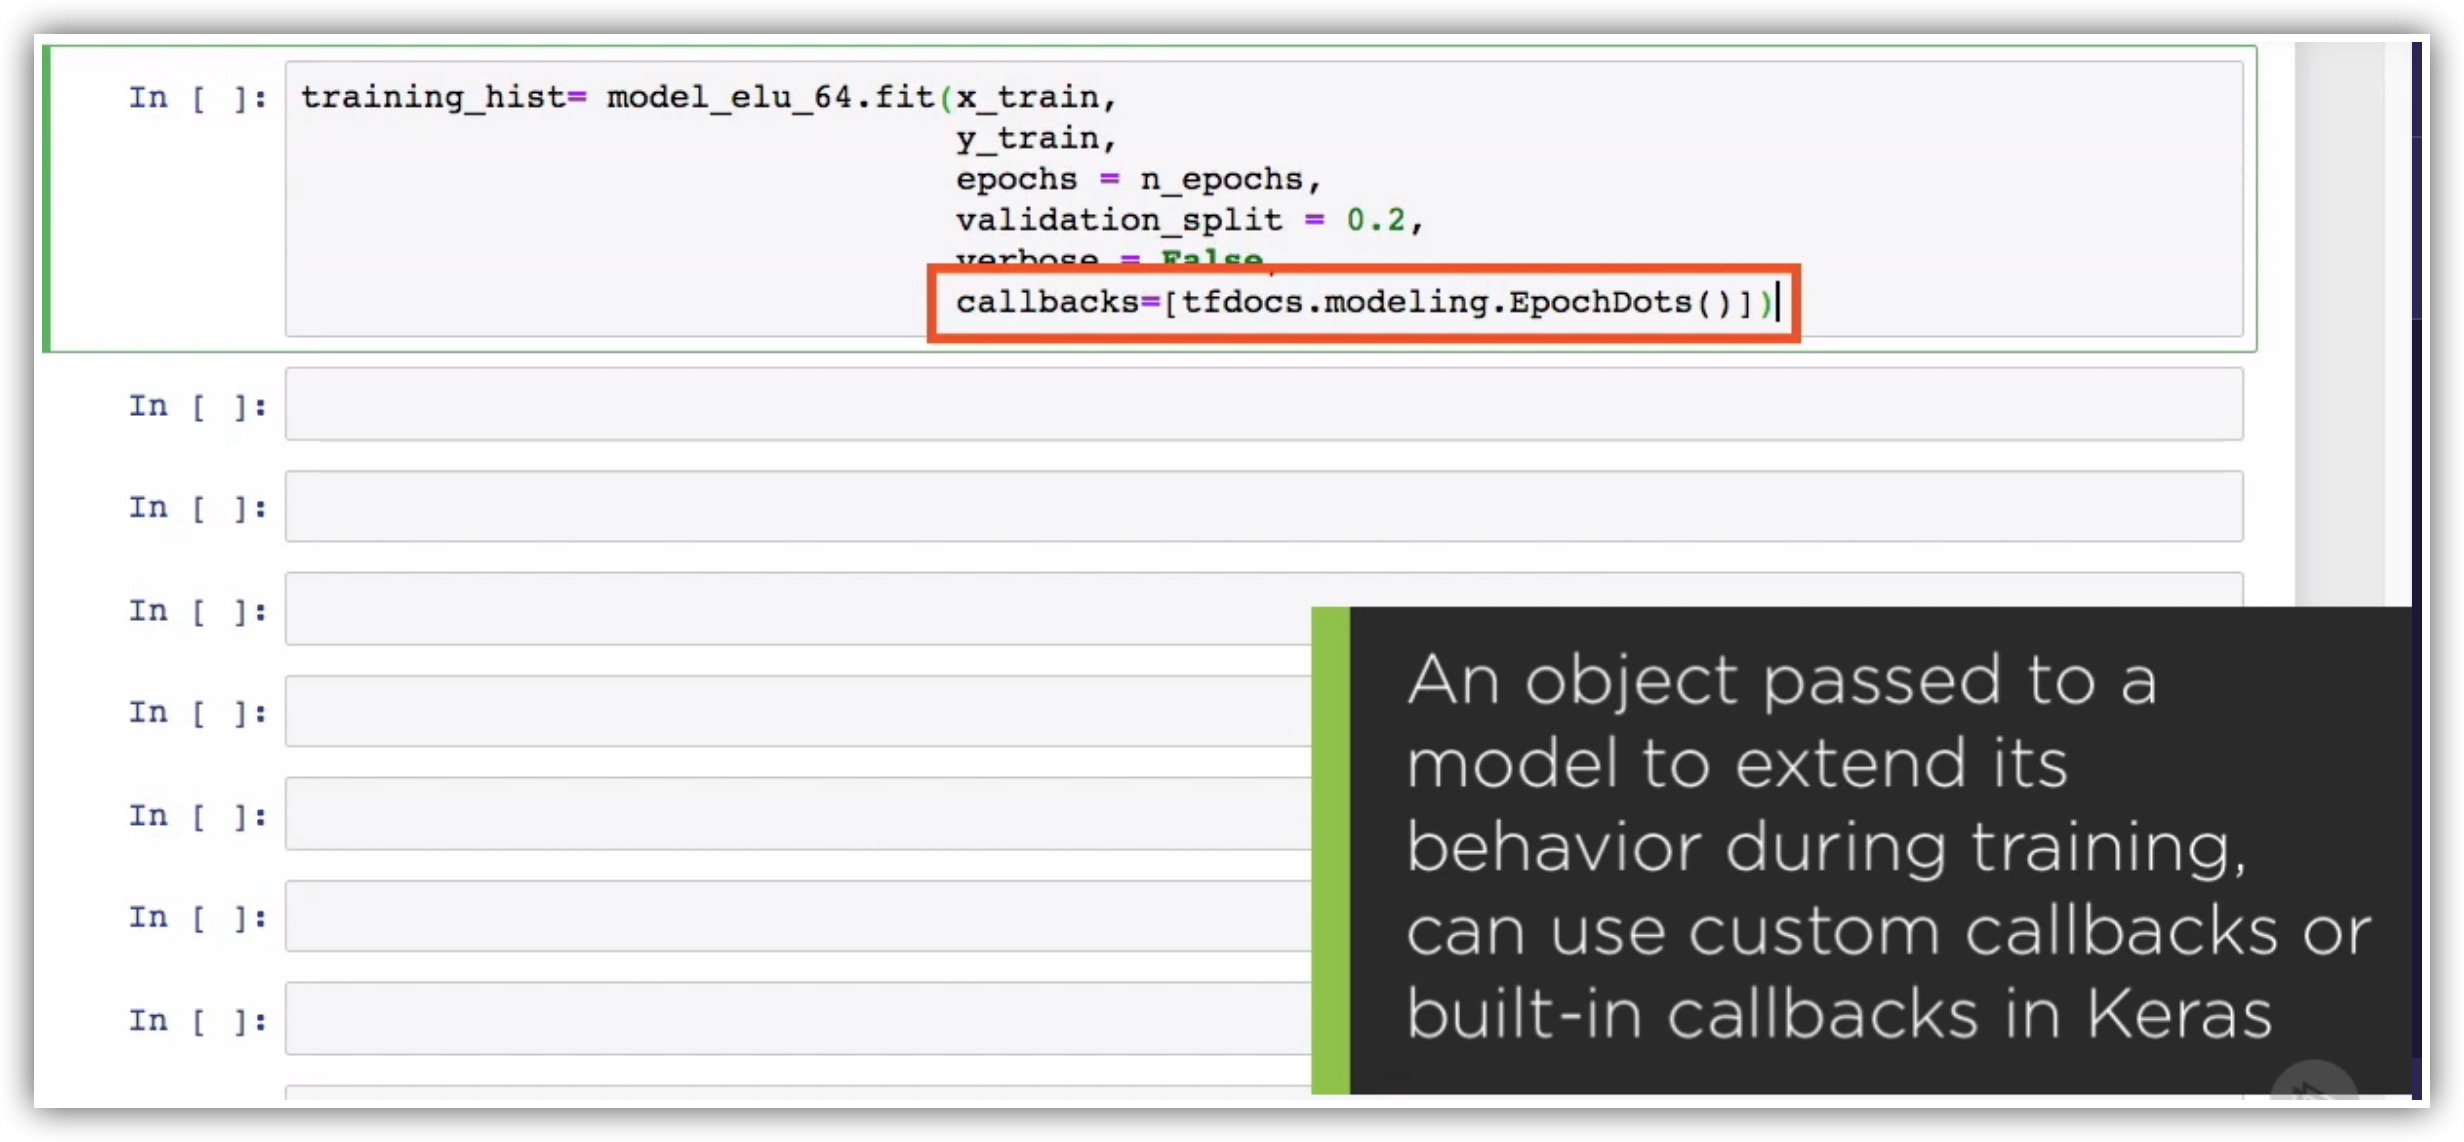

In [79]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_14-26-19.jpg')

In [80]:
'''
nce we've trained this model, we can visualize this using the data available in the training history variable. 
We've also added the epoch as a column here.
'''

training_hist_df = pd.DataFrame(training_hist.history)
training_hist_df['epoch'] = training_hist.epoch
DisplayMatrix(training_hist_df.tail())

╔═════╦═════════════╦═════════╦═════════════╦═════════════╦═══════════╦═════════════╦═════════╗
║     ║        loss ║     mae ║         mse ║    val_loss ║   val_mae ║     val_mse ║   epoch ║
╠═════╬═════════════╬═════════╬═════════════╬═════════════╬═══════════╬═════════════╬═════════╣
║ 995 ║ 2.78545e+07 ║ 3434.74 ║ 2.78545e+07 ║ 2.24173e+07 ║   2748.5  ║ 2.24173e+07 ║     995 ║
╠═════╬═════════════╬═════════╬═════════════╬═════════════╬═══════════╬═════════════╬═════════╣
║ 996 ║ 2.80809e+07 ║ 3432.69 ║ 2.80809e+07 ║ 2.23977e+07 ║   2728.2  ║ 2.23977e+07 ║     996 ║
╠═════╬═════════════╬═════════╬═════════════╬═════════════╬═══════════╬═════════════╬═════════╣
║ 997 ║ 2.87488e+07 ║ 3531.41 ║ 2.87488e+07 ║ 2.24286e+07 ║   2699.74 ║ 2.24286e+07 ║     997 ║
╠═════╬═════════════╬═════════╬═════════════╬═════════════╬═══════════╬═════════════╬═════════╣
║ 998 ║ 2.60991e+07 ║ 3316.2  ║ 2.60991e+07 ║ 2.2401e+07  ║   2674.94 ║ 2.2401e+07  ║     998 ║
╠═════╬═════════════╬═════════╬═════════

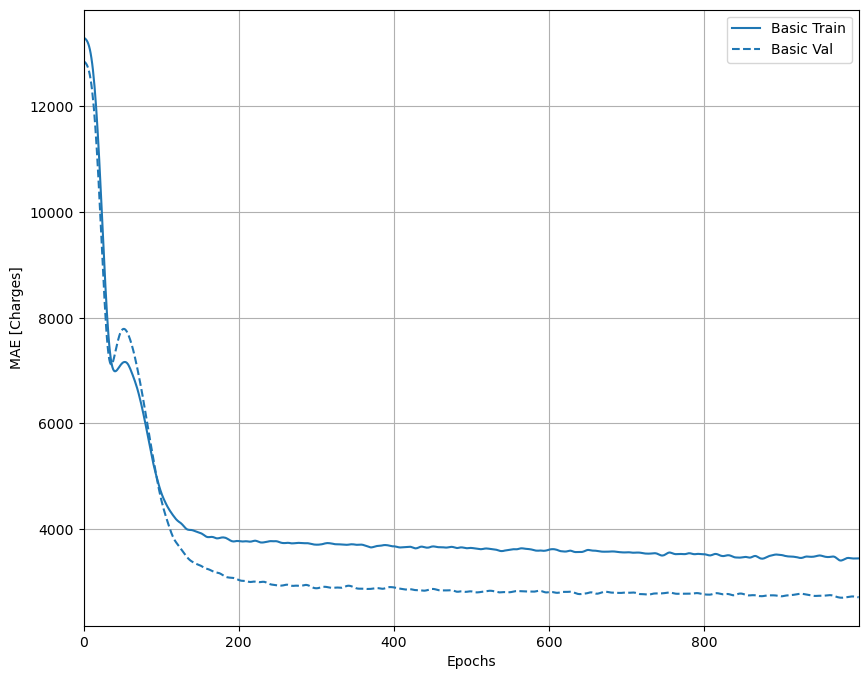

In [81]:
'''
Let's use the plotter to plot the mean absolute error for this model. Once again, here is the mean absolute 
error for the training, as well as validation data. 

Observe that the mean absolute error for the validation data is lower than training, which is great.

This seems to indicate that the addition of the Dropout layer mitigated the effects 
of over fitting our model seems to have performed better on the validation data. 
'''

plt.figure(figsize=(10, 8))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': training_hist}, metric="mae")
plt.ylabel('MAE [Charges]')
plt.show()

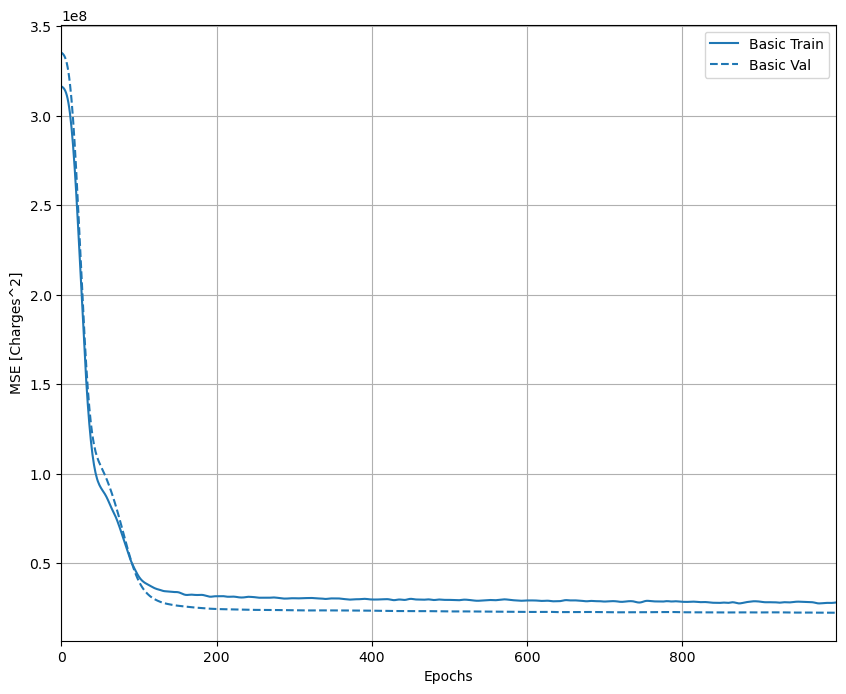

In [82]:
'''
 Let's visualize the mean square error during the training process as well. Once again, we get information for training, as well as validation, 
 and the MSE for validation data seems to be lower than that of training. 
'''
plt.figure(figsize=(10, 8))
plotter.plot({'Basic': training_hist}, metric="mse")
plt.ylabel('MSE [Charges^2]')
plt.show()

In [83]:
'''
If you want to quickly evaluate your model on the test data, you can use the .evaluate method, 
which will give you value for all of the metrics monitored on the test data, means square error, 
mean absolute error, and loss.
'''
loss, mae, mse = model_elu_64.evaluate(X_test, y_test, verbose=2)

9/9 - 0s - loss: 21580778.0000 - mae: 2763.3132 - mse: 21580778.0000 - 31ms/epoch - 3ms/step


9/9 [==============================] - 0s 1ms/step


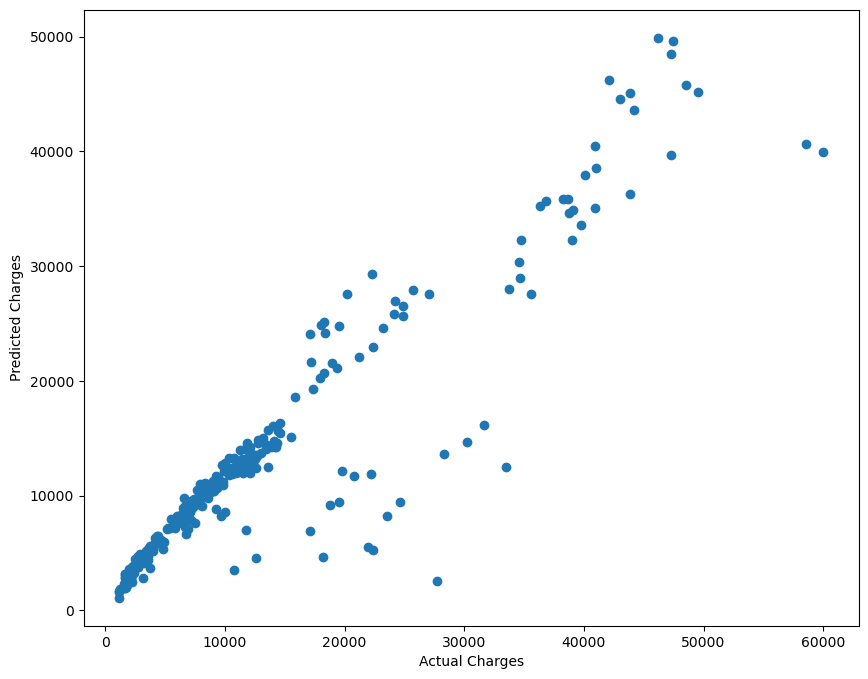

In [85]:
'''
We are now ready to get predictions from our elu model here. Run predict on the test data and 
let's plot a scatter plot of actual values versus predicted values. 

Once again, they seem to match closely, but a more objective measure of our model is the r2 score, and it's 85%.

The overall r2 might be lower for this model then the model that we had earlier, which had no Dropout, 
but I believe this model is more robust thanks to the presence of the Dropout layer. 
'''
plt.figure(figsize=(10, 8))
y_pred = model_elu_64.predict(X_test).flatten()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [86]:
r2_score(y_test, y_pred)

0.85543486397323

In [88]:
'''
Now, for the models that we've had so far, we've trained for 1,000 epochs, but we saw that for 
the last few 100 epochs, our model did not really improve, so we ended up with additional 
iterations of training that may not be actually required.

Let's now build a new model with EarlyStopping. Invoke the build_model function, 
and this time we'll use EarlyStopping to short circuit the training process of 
our model using the EarlyStopping callback. 

This model allows us to interrupt the training process when the validation performance of our model 
has stopped improving. 

What do we mean by improving? We can specify this using the parameters to this EarlyStopping callback. 
Here we'll monitor the validation loss, and if the validation loss does not improve for five epochs, 
that is patience equal to 5, we'll stop the training process. 

Let's call fit on this model where we've added in the EarlyStopping callback. 
So the remaining parameters remain the same. The callbacks parameter takes in an additional callback, 
EarlyStop. 

When you run this model, you'll see that the training process completes very quickly. 
Somewhere after around 200 epochs, we stop the training process because our model hasn't improved 
based on the validation loss metric. 
'''
model_elu_64_early_stopping = build_model()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
training_hist = model_elu_64_early_stopping.fit(X_train,
                                                y_train,
                                                epochs=1000,
                                                validation_split=0.2,
                                                verbose=False,
                                                callbacks=[tfdocs.modeling.EpochDots(), early_stopping])


Epoch: 0, loss:317057376.0000,  mae:13317.7715,  mse:317057376.0000,  val_loss:336099232.0000,  val_mae:12877.0605,  val_mse:336099232.0000,  
....................................................................................................
Epoch: 100, loss:44486340.0000,  mae:4812.0278,  mse:44486340.0000,  val_loss:43024328.0000,  val_mae:4827.0732,  val_mse:43024328.0000,  
....................................................................................................
Epoch: 200, loss:32053234.0000,  mae:3805.8972,  mse:32053234.0000,  val_loss:24606698.0000,  val_mae:3062.2651,  val_mse:24606698.0000,  
........................

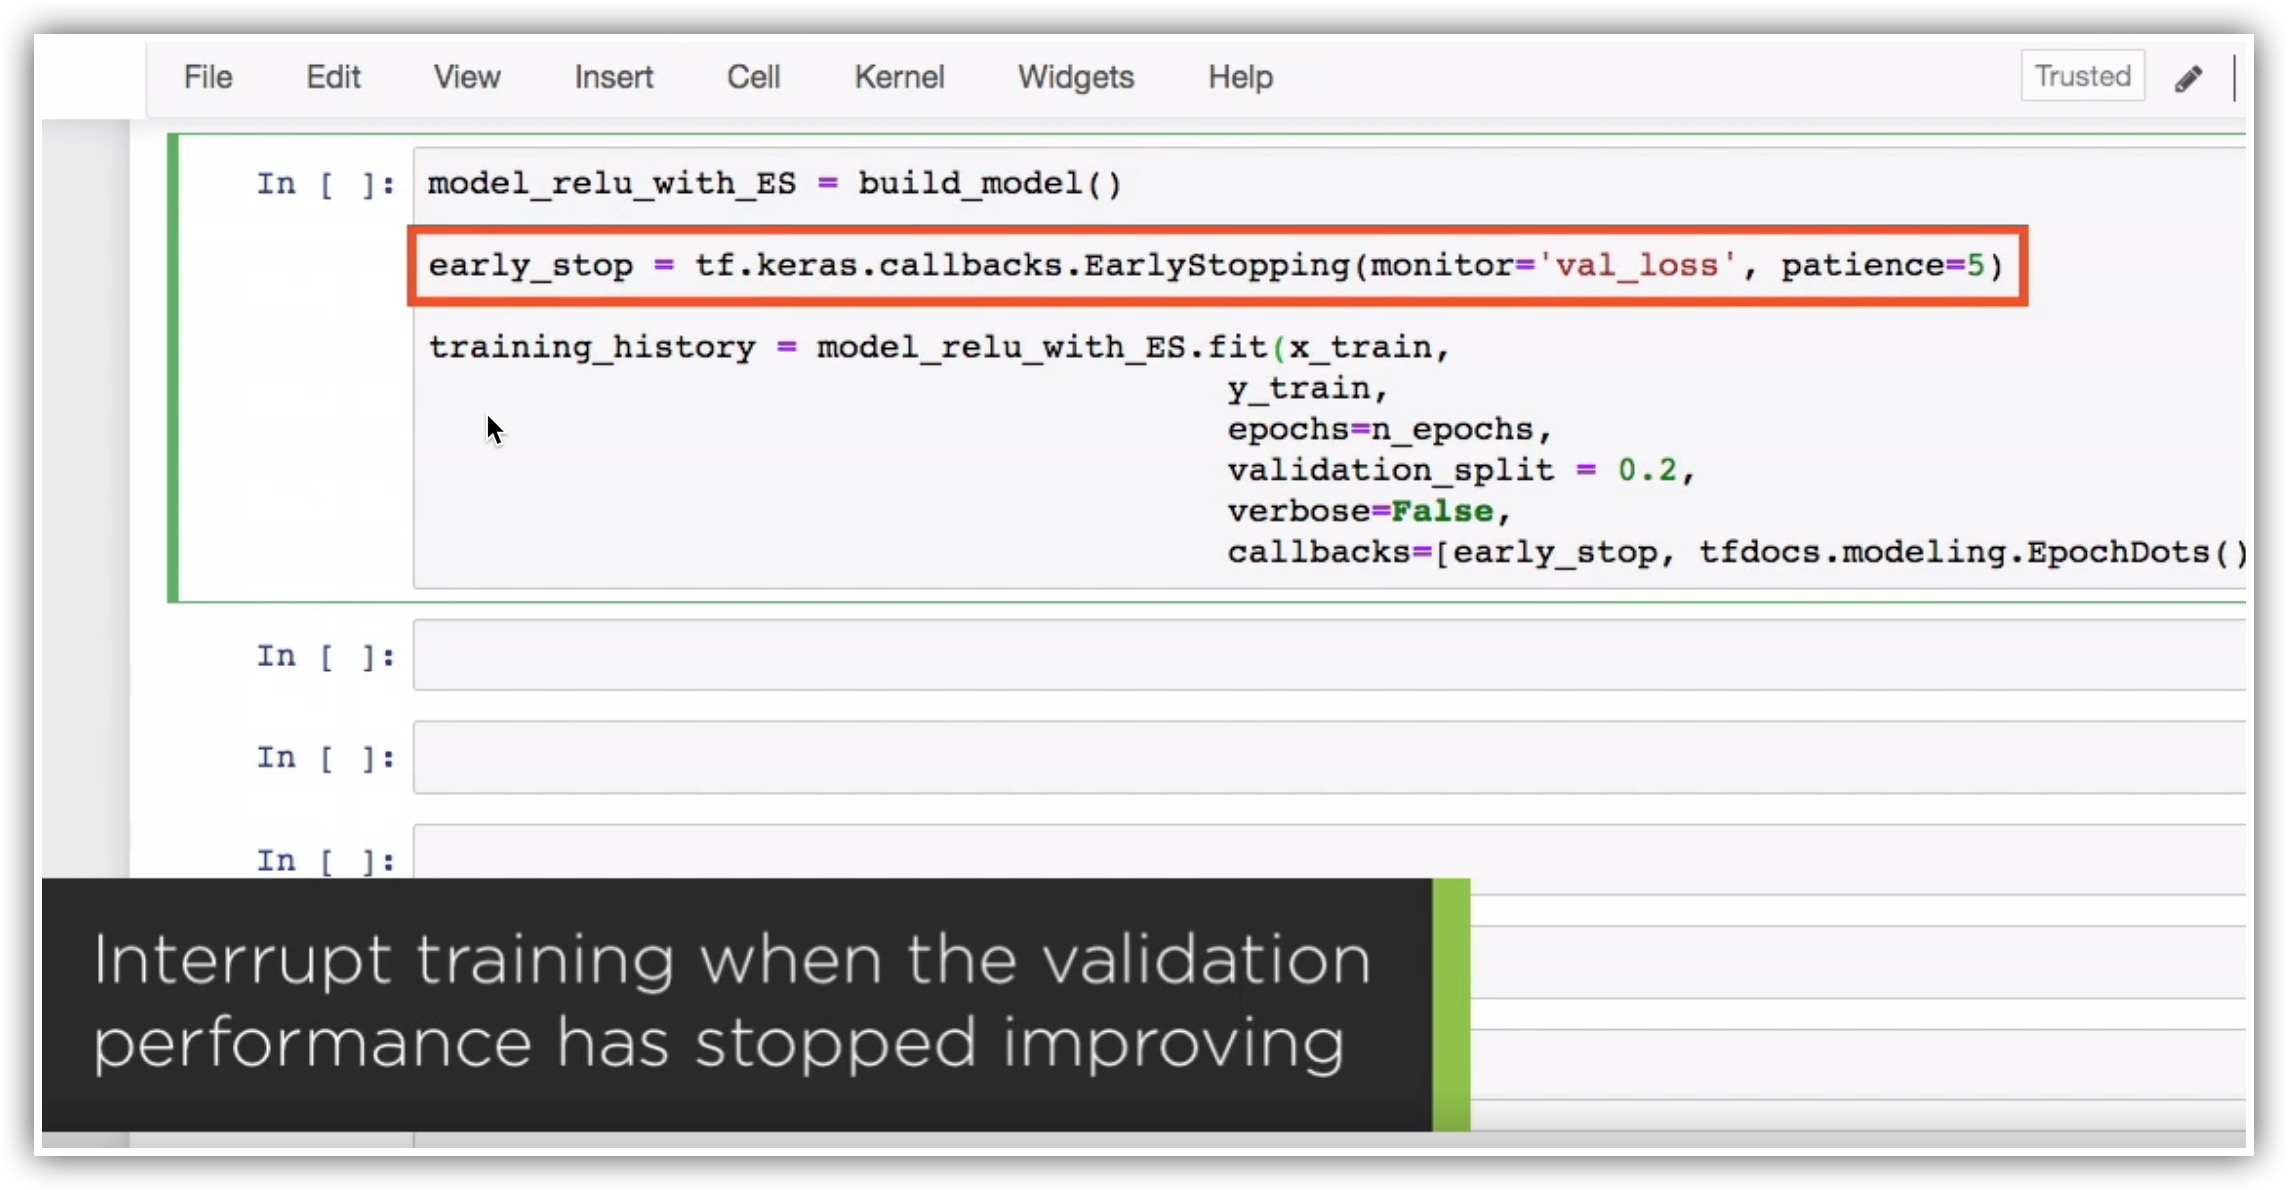

In [87]:
Image('/Users/subhasish/Development/GIT/Interstellar/SB-AI-DEV/DL/CNN/Pluralsight/Janani Ravi/Build a Machine Learning Workflow with Keras TensorFlow 2.0/SB/Images/2023-05-27_14-38-52.jpg')

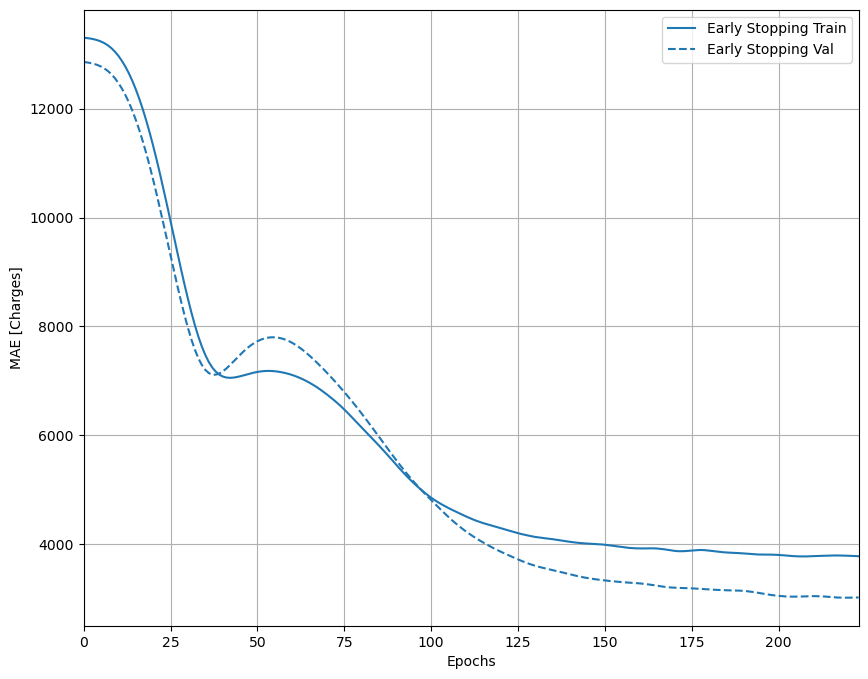

In [89]:
'''
We're now ready to visualize how the mean absolute error of our model changes for this EarlyStopping model. 
You can see that we'll run for about 250 epochs and then stop. 
'''
plt.figure(figsize=(10, 8))
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Early Stopping': training_hist}, metric="mae")
plt.ylabel('MAE [Charges]')
plt.show()

9/9 [==============================] - 0s 989us/step


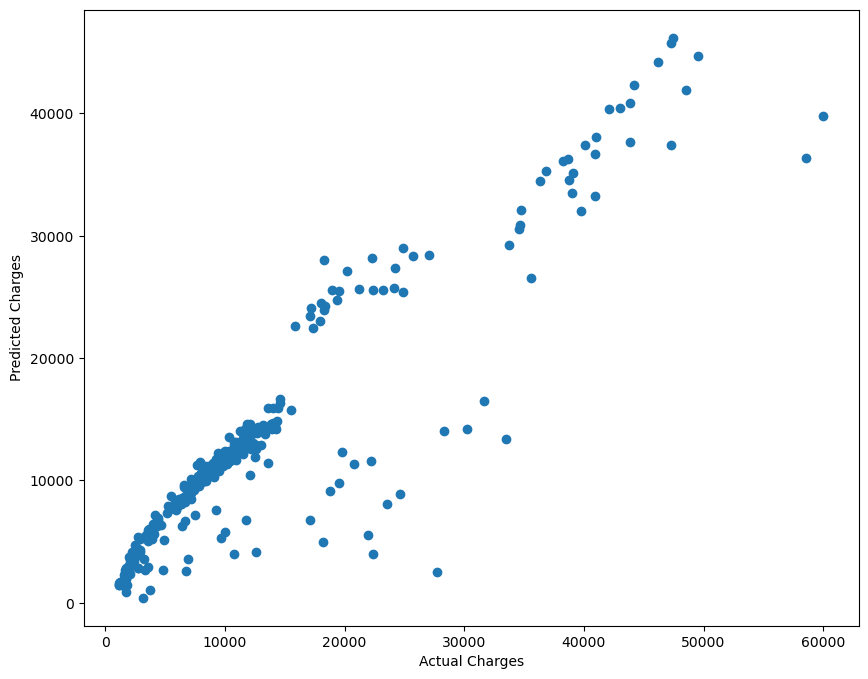

In [90]:
'''
Let's use this EarlyStopping model for prediction on the test data and plot a scatter plot of test 
values versus actually values. 

The scatter plot looks pretty good. Let's calculate the r2 score on the test data, and we get an r2 score of 83%. 
'''
y_pred = model_elu_64_early_stopping.predict(X_test).flatten()
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

In [91]:
r2_score(y_test, y_pred)

0.8369305583435344

In [92]:
model_elu_64_early_stopping.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                320       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________
